In [4]:
working_dir = '/data/analysis/data_becavin/scMusketeers/'
fig_dir = '/data/analysis/data_becavin/scMusketeers/analysis_notebooks/figures_review/'

In [2]:
# working_dir = '/workspace/cell/scPermut_Antoine/'
# fig_dir = '/workspace/cell/scPermut_Antoine//analysis_notebooks/figures_review/'

In [4]:
# working_dir = '/workspace/cell/scMusketeers/'
# fig_dir = '/workspace/cell/scMusketeers//analysis_notebooks/figures_review/'

In [5]:
import sys
sys.path.append(working_dir)

In [ ]:
#import scmusketeers
from notebook_tools import *

2025-10-09 22:16:22.462185: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-09 22:16:22.477236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760040982.494631 4086849 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760040982.499851 4086849 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760040982.513568 4086849 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Setup

In [ ]:
import os
import pandas as pd
task1_path = os.path.join(fig_dir,"task_1.pkl")
if os.path.exists(task1_path):
    runs_table_df = pd.read_pickle(task1_path)    
else:
    runs_table_df = load_run_df("task_1")
    runs_table_df.to_pickle(task1_path)

In [9]:
runs_table_df

,sys_creation_time,sys_description,sys_failed,sys_group_tags,sys_hostname,sys_id,sys_modification_time,sys_monitoring_time,sys_name,sys_owner,...,monitoring_fef0b104_tid,monitoring_ff17596b_cpu,monitoring_ff17596b_gpu,monitoring_ff17596b_gpu_memory,monitoring_ff17596b_hostname,monitoring_ff17596b_memory,monitoring_ff17596b_pid,monitoring_ff17596b_stderr,monitoring_ff17596b_stdout,monitoring_ff17596b_tid
0,2024-11-15 14:59:33.464,,False,,gpu02,BEN-11239,2024-11-15 19:49:46.137,17412,BEN-11239,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-15 14:55:20.605,,False,,gpu01,BEN-11238,2024-11-15 19:18:02.491,15759,BEN-11238,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-11-08 19:48:52.793,,False,,gpu01,BEN-11218,2024-11-09 00:36:13.737,17240,BEN-11218,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-11-08 19:47:22.873,,False,,gpu01,BEN-11217,2024-11-09 00:09:39.485,15733,BEN-11217,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-11-08 15:33:36.485,,False,,gpu01,BEN-11212,2024-11-08 19:48:45.656,15308,BEN-11212,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2024-04-27 16:54:40.444,,False,NaN,compute32,BEN-9639,2024-04-28 14:33:33.853,77930,Untitled,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,2024-03-09 10:56:33.971,,False,NaN,compute18,BEN-4962,2024-04-04 08:55:09.135,7,Untitled,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1045,2024-03-09 10:23:07.201,,False,NaN,compute18,BEN-4951,2024-04-04 08:55:08.826,2016,Untitled,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048,2024-03-09 07:19:54.154,,False,NaN,compute18,BEN-4903,2024-04-04 08:55:08.500,13007,Untitled,blaireaufurtif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test_fold_selection = load_json(working_dir + 'experiment_script/benchmark/hp_test_folds')
test_obs = load_json(working_dir + 'experiment_script/benchmark/hp_test_obs')

In [11]:
working_dir

'/data/analysis/data_becavin/scMusketeers/'

In [12]:
models = ['scPermut', 'scanvi', 'uce', 'pca_svm', 'harmony_svm', 'celltypist', 'scmap_cells', 'scmap_cluster'] #

In [14]:
aestetic_model_name = {'scPermut_default' : '1.scMusketeers',
                       # 'scPermut' : '1.scMusketeers - optimized',
    
                        'scanvi' : '2.scANVI',
                       'uce' : '3.UCE', 
                       'harmony_svm' : '4.Harmony',
                       'pca_svm' : '5.PCA',
                        'celltypist' : '6.Celltypist',
                       'scmap_cells' : '7.scmap - cells',
                       'scmap_cluster' : '8.scmap - cluster'}
colors = {#'scPermut' : "#B15240",
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          # 'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}

colors = {aestetic_model_name[k]: v for k, v in colors.items()}

diff_dict
diff_dict = {'all12':['tosti_2021',
  'yoshida_2021',
  'htap',
  'ajrccm_by_batch', 
    'dominguez_2022_lymph',
  'dominguez_2022_spleen'],
'all22': ['tabula_2022_spleen',
                    'koenig_2022', 'litvinukova_2020', 'lake_2021',
                    'hlca_par_dataset_harmonized', 'hlca_trac_dataset_harmonized']}

metric_names = {'balanced_acc': 'Balanced Accuracy',
                'acc': 'Accuracy',
                'f1_score': 'F1 score',
                'balanced_f1_score': 'Balanced F1 score',
                'mcc': 'MCC',
                'balanced_mcc': 'Balanced MCC',
                'ARI': 'ARI',
                'NMI': 'NMI'
               }

# Task 1 boxplots

## Supp Figure Task 1 



In [ ]:
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'# VERY IMPORTANT to only consider the default params
split = 'test'
met = 'balanced_acc' # balanced_acc balanced_f1_score

show_legend = False
# exclude_ds = ['tosti_2021', 'koenig_2022', 'litvinukova_2020','hlca_par_dataset_harmonized', 'hlca_trac_dataset_harmonized']
exclude_ds = []
for met in ['acc','f1_score', 'balanced_f1_score', 'mcc', 'balanced_mcc', 'ARI', 'NMI']:
    for diff in diff_dict:
        if diff != 'dataset':
            print(f'--------- {diff} ---------')
            n_lines = max(len([ i for i in diff_dict[diff] if i not in exclude_ds]),2)
            f, axes = plt.subplots(n_lines, 3, figsize = (25,5*n_lines))
            i=0
            for dataset_name in diff_dict[diff]:
                if dataset_name not in exclude_ds:
                    
                    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status != True')# Don't select deprecated versions
                    task_1 = task_1.loc[task_1['model'] != 'scPermut']
                    task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:] # Removing the other training_schemes from the default config
                    task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['debug_status'] != 'fixed_1')),:]
                    
                    task_1['dataset_name'] =task_1['dataset_name'].replace(aestetic_data_name)
                    task_1['model'] =task_1['model'].replace(aestetic_model_name)
                    
                    # task_1['model'] = pd.Categorical(task_1['model'], ['scPermut', 'scanvi', 'uce', 'pca_svm', 'harmony_svm', 'celltypist', 'scmap_cells', 'scmap_cluster']) 
                    bplot1 = axes[i,0]
                    bplot2 = axes[i,1]
                    bplot3 = axes[i,2]
    
                    metric_name = metric_names[met]

                    
                    sns.boxplot(x = 'model',y =f'{split}_{met}', order = colors.keys(), hue = 'model',hue_order = colors.keys(), data = task_1, ax = bplot1, palette = sns.color_palette(colors.values()))
                    bplot1.tick_params(axis='x', rotation=90)
                    if i == 0:
                        bplot1.set_title(f'{metric_name} on the whole test dataset')
                    if i != n_lines:
                        bplot1.set_xlabel('')
                    if i == n_lines:
                        bplot1.set_xlabel('Model')
                    bplot1.set_ylabel(f'{aestetic_data_name[dataset_name]}') # - {diff} setup')
                    
                    sub =task_1[['model', 'test_fold_nb',f'{split}_{met}', f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}']]
                    sub = pd.melt(sub, id_vars = 'model', value_vars = [f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}'])
                    sub = sub.replace({f'{split}_xxsmall_{met}' : '<0.1%',f'{split}_small_{met}':'<1%', f'{split}_medium_{met}':'<10%',f'{split}_large_{met}':'>10%'})
    
                    # sns.lineplot(data=sub, x="variable", y="value", hue = 'model', hue_order = colors.keys(),ax = bplot2,palette = sns.color_palette(colors.values()), markers = True)
                    if dataset_name in ['hlca_trac_dataset_harmonized', aestetic_data_name['hlca_trac_dataset_harmonized']]:
                        ord =  ['<1%','<10%','>10%']
                    elif dataset_name in ['lake_2021', aestetic_data_name['lake_2021']]:
                        ord =  ['<0.1%','<1%','<10%']
                    else :
                        ord = ['<0.1%','<1%','<10%','>10%']
                        
                    sns.boxplot(x='variable',y ='value',hue = 'model',order = ord, hue_order = colors.keys(), data = sub,ax = bplot2, palette = sns.color_palette(colors.values()))
                    bplot2.tick_params(axis='x', rotation=0)
                    bplot2.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
                    bplot2.set_ylabel(metric_name)
                    if i == 0:
                        bplot2.set_title(f'{metric_name} on the test dataset split by celltype sizes')
                    if i != n_lines:
                        bplot2.set_xlabel('')
                    if i == n_lines:
                        bplot2.set_xlabel('Celltype size')
                    bplot2.set_ylabel('')
                    
                    sns.boxplot(x = 'model',y =f'full_batch_mixing_entropy', order = colors.keys(), hue = 'model',hue_order = colors.keys(), data = task_1, ax = bplot3, palette = sns.color_palette(colors.values()))
                    bplot3.tick_params(axis='x', rotation=90)
                    bplot3.set_ylabel('') #BE
                    if i == 0:
                        bplot3.set_title('Batch mixing entropy the whole dataset')
                    if i != n_lines:
                        bplot3.set_xlabel('')
                    if i == n_lines:
                        bplot3.set_xlabel('Model')
    
                    if not show_legend: 
                        # bplot1.get_legend().set_visible(False)
                        bplot2.get_legend().set_visible(False)
                        # bplot3.get_legend().set_visible(False)
                    
                    # f.suptitle(f'{dataset_name} - {diff} setup')
                    i+=1
                    plt.tight_layout()
                    dir = f'{fig_dir}task_1/prediction_boxplot/{split}_{met}/'
                    check_dir(dir)
                    f.savefig(dir + f'prediction_boxplot_{diff}.png', transparent=False)
                    
                

In [ ]:
import os
os.getcwd()

## Figure 2

In [ ]:
diff_dict = {'homo': ['tosti_2021',  'yoshida_2021', 'htap', 'ajrccm_by_batch'], 
           'assays': ['dominguez_2022_lymph', 'dominguez_2022_spleen', 'tabula_2022_spleen'],
           'suspension': ['koenig_2022', 'litvinukova_2020', 'lake_2021'],
           'datasets': ['hlca_par_dataset_harmonized','hlca_trac_dataset_harmonized']}

In [ ]:
# Creating the sub table containing the information for each batch type (cf diff_dict)

runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'

t1 = pd.DataFrame()
task_dict = {}
for diff in diff_dict:
    if diff != 'dataset':
        print(f'--------- {diff} ---------')
        # n_lines = max(len([ i for i in diff_dict[diff] if i not in exclude_ds]),2)
        # f, axes = plt.subplots(n_lines, 3, figsize = (25,5*n_lines))
        i=0
        sub_task= pd.DataFrame()
        for dataset_name in diff_dict[diff]:
            # if dataset_name not in exclude_ds:
            task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status != True')
            task_1 = task_1.loc[task_1['model'] != 'scPermut']
            task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:] # Removing the other training_schemes from the default config
            task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['debug_status'] != 'fixed_1')),:]
            t1 = pd.concat([t1, task_1])
            sub_task = pd.concat([sub_task, task_1])
    task_dict[diff] = sub_task.copy()

In [ ]:
# Plotting acc boxplot from Figure 2 
from statannotations.Annotator import Annotator
aestetic_model_name = {'scPermut_default' : '1.scMusketeers',
                        'scanvi' : '2.scANVI',
                       'uce' : '3.UCE', 
                       'harmony_svm' : '4.Harmony',
                       'pca_svm' : '5.PCA',
                        'celltypist' : '6.Celltypist',
                       'scmap_cells' : '7.scmap - cells',
                       'scmap_cluster' : '8.scmap - cluster'}
colors = {
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          # 'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}

colors = {aestetic_model_name[k]: v for k, v in colors.items()}

split = 'test'
# met = 'balanced_acc' 

i = 0
xsizes =  [24,15,15,10]
ysizes = [5,4,4,3]
for met in ['balanced_acc']:#, 'acc','f1_score', 'balanced_f1_score', 'mcc', 'balanced_mcc', 'ARI', 'NMI']: # Select the wanted metric here
    i=0
    for comp, df in task_dict.items():
        df = df.copy()
        df = df[df['model'] != 'scPermut']
        sns.set_theme(style="white")
        n_dataset = df['dataset_name'].nunique()
        f, ax = plt.subplots(1, figsize = (xsizes[i],ysizes[i]),dpi = 200)
    
        metric_name = metric_names[met]
        
        df['dataset_name'] = df['dataset_name'].replace(aestetic_data_name)
        df['model'] = df['model'].replace(aestetic_model_name)
        # print(df['model'].value_counts())
        sns.boxplot(x = 'dataset_name',y =f'{split}_{met}',  hue = 'model',data = df, hue_order = colors.keys(),  ax =ax, palette = sns.color_palette(colors.values()), orient ='v', flierprops={"marker": "."},
        )
        ax.tick_params(axis='x', rotation=0, labelsize=8)
        
        ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
        ax.set_ylabel(f'{metric_name} on Test')
        ax.set_xlabel(f'')
        ax.set(ylim = (0.2,1))
        ax.set_title(comp)

        # Add stat bars
        pairs = []
        for dataset in df['dataset_name'].unique():
            for k in range(1, len(colors.keys())):
                pair = (dataset, list(colors.keys())[0]), (dataset, list(colors.keys())[k])
                print(pair)
                pairs.append(pair)
            
        order = list(aestetic_model_name.keys())
        annotator = Annotator(ax, pairs, data=df, x='dataset_name', y=f'{split}_{met}', hue = 'model', hue_order = colors.keys())
        annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
        annotator.apply_and_annotate()
    
        plt.tight_layout()
        i+=1
        dir = f'{fig_dir}task_1/prediction_boxplot/{split}_{met}/'
        check_dir(dir)
        ax.get_figure().savefig(dir + f'prediction_boxplot_{comp}.png', transparent=False)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Assuming 'task_dict' and 'aestetic_model_name' are already defined

stat_results = []
our_model_name = 'scPermut_default'
our_model_aesthetic = aestetic_model_name[our_model_name]

# A small constant to avoid division by zero
EPSILON = 1e-9

for comp, df in task_dict.items():
    df = df.copy()
    for dataset in df['dataset_name'].unique():
        dataset_df = df[df['dataset_name'] == dataset]
        our_model_scores = dataset_df[dataset_df['model'] == our_model_name]['test_balanced_acc']
        
        competitor_models = [m for m in dataset_df['model'].unique() if m != our_model_name]
        
        for competitor in competitor_models:
            competitor_scores = dataset_df[dataset_df['model'] == competitor]['test_balanced_acc']
            
            # --- P-value calculation ---
            if our_model_scores.nunique() < 2 or competitor_scores.nunique() < 2:
                p_value = 1.0 # Cannot perform test if variance is zero
            else:
                _, p_value = mannwhitneyu(our_model_scores, competitor_scores, alternative='two-sided')
            
            # --- Log-Fold Change (LFC) calculation ---
            our_median = our_model_scores.median()
            competitor_median = competitor_scores.median()
            
            # Calculate log2 fold change
            log2fc = np.log2(our_median / (competitor_median + EPSILON))

            stat_results.append({
                'Group': comp,
                'Dataset': dataset,
                'Competitor': aestetic_model_name.get(competitor, competitor),
                'p_value': p_value,
                'log2_fold_change': log2fc
            })

p_value_df = pd.DataFrame(stat_results)

# --- Create a combined, pivoted table for the paper ---

# Pivot both p-values and LFCs
p_value_table = p_value_df.pivot_table(index=['Group', 'Dataset'], columns='Competitor', values='p_value')
lfc_table = p_value_df.pivot_table(index=['Group', 'Dataset'], columns='Competitor', values='log2_fold_change')

# Function to format a single cell with LFC and p-value
def format_lfc_pvalue(lfc, p_val):
    if pd.isna(lfc) or pd.isna(p_val):
        return '-'
    
    # Format LFC with a sign
    lfc_str = f"{lfc:+.2f}"
    
    # Format p-value with significance stars
    if p_val < 0.0001:
        p_str = f"({p_val:.1e})****"
    elif p_val < 0.001:
        p_str = f"({p_val:.3f})***"
    elif p_val < 0.01:
        p_str = f"({p_val:.3f})**"
    elif p_val < 0.05:
        p_str = f"({p_val:.3f})*"
    else:
        p_str = f"({p_val:.3f})"
        
    return f"{lfc_str} {p_str}"

# Create the final formatted table by applying the function element-wise
# Ensure both tables are aligned
lfc_table, p_value_table = lfc_table.align(p_value_table, join='outer')
formatted_table = lfc_table.copy()

for col in formatted_table.columns:
    for idx in formatted_table.index:
        lfc = lfc_table.loc[idx, col]
        p_val = p_value_table.loc[idx, col]
        formatted_table.loc[idx, col] = format_lfc_pvalue(lfc, p_val)

print(f"LFC and P-value summary table comparing '{our_model_aesthetic}' against competitors:")
display(formatted_table)

# You can save this table to a CSV file for easy import into other software
formatted_table.to_csv(os.path.join(fig_dir,'statistical_summary_lfc_pvalue.csv'))

In [ ]:
# --- Assume these DataFrames from previous steps already exist ---
# formatted_table: The LFC + p-value table for balanced accuracy
# formatted_table_be: The LFC + p-value table for batch mixing entropy
# final_table: The summary table for training time

# --- 1. Save the Balanced Accuracy Table ---
# We use multirow=True to properly format the multi-level index ('Group', 'Dataset')
# We set escape=False to ensure our custom formatting (like stars) is preserved
latex_accuracy = formatted_table.to_latex(
    caption='Statistical comparison of balanced accuracy for scMusketeers against other methods. Values represent the log2-fold change in median accuracy, with Mann-Whitney U test p-values in parentheses. Significance is denoted as: * p < 0.05, ** p < 0.01, *** p < 0.001, **** p < 0.0001.',
    label='tab:supp_accuracy',
    multirow=True,
    escape=False,
    position='h!' # Tells LaTeX to place the table "here!" if possible
)

# Save to a .tex file
with open(os.path.join(fig_dir,"statistical_summary_accuracy.tex"), "w") as f:
    f.write(latex_accuracy)

print("Saved 'statistical_summary_accuracy.tex'")



In [ ]:
aestetic_model_name = {
                       'scPermut_default' : '1.scMusketeers',
                        'scanvi' : '2.scANVI',
                       'uce' : '3.UCE', 
                       'harmony_svm' : '4.Harmony',
                       'pca_svm' : '5.PCA',
                        'celltypist' : '6.Celltypist',
                       'scmap_cells' : '7.scmap - cells',
                       'scmap_cluster' : '8.scmap - cluster'}
colors = {
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          # 'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}
colors_BE = {k:v for k, v in colors.items() if k not in ['celltypist','scmap_cells','scmap_cluster']}

colors = {aestetic_model_name[k]: v for k, v in colors.items()}
colors_BE = {aestetic_model_name[k]: v for k, v in colors_BE.items()}
pairs = []
for dataset in df['dataset_name'].unique():
    for i in range(1, len(colors_BE.keys())):
        pair = (dataset, list(colors_BE.keys())[0]), (dataset, list(colors_BE.keys())[i])
        print(pair)
        pairs.append(pair)

In [ ]:
from statannotations.Annotator import Annotator

In [ ]:
i = 0
xsizes =  [20,12,12,8]
ysizes = [5,4,4,3]
for comp, df in task_dict.items():
    print(comp)
    df = df.copy()
    df = df[df['model'] != 'scPermut']
    sns.set_theme(style="white")
    n_dataset = df['dataset_name'].nunique()
    split = 'full'
    met = 'batch_mixing_entropy'
    f, ax = plt.subplots(1, figsize = (xsizes[i],ysizes[i]),dpi = 200)
    
    df['model'] = df['model'].replace({'Celltypist': 'PCA',
               'scmap - cells': 'PCA',
               'scmap - cluster': 'PCA'})
    
    
    df['dataset_name'] = df['dataset_name'].replace(aestetic_data_name)
    df['model'] = df['model'].replace(aestetic_model_name)
    sns.boxplot(x = 'dataset_name',y =f'{split}_{met}',  hue = 'model',data = df, hue_order = colors_BE.keys(),  ax =ax, palette = sns.color_palette(colors_BE.values()), orient ='v', flierprops={"marker": "."},
    )
    ax.tick_params(axis='x', rotation=0, labelsize=8)
    
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    ax.set_ylabel(f'Batch mixing entropy')
    ax.set_xlabel(f'')
    ax.set(ylim = (0,0.7))
    ax.set_title(comp)
    
    # Add stat bars
    pairs = []
    for dataset in df['dataset_name'].unique():
        for k in range(1, len(colors_BE.keys())):
            pair = (dataset, list(colors_BE.keys())[0]), (dataset, list(colors_BE.keys())[k])
            print(pair)
            pairs.append(pair)
        
    order = list(aestetic_model_name.keys())
    annotator = Annotator(ax, pairs, data=df, x='dataset_name', y=f'{split}_{met}', hue = 'model', hue_order = colors_BE.keys())
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

    plt.tight_layout()
    i+=1
    ax.get_figure().savefig(f'{fig_dir}task_1/prediction_boxplot_{comp}_dataset_BE.png', transparent=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Assuming 'task_dict' and 'aestetic_model_name' are already defined from your setup

# --- Configuration ---
METRIC_COLUMN = 'full_batch_mixing_entropy'
OUR_MODEL_NAME = 'scPermut_default'
our_model_aesthetic = aestetic_model_name[OUR_MODEL_NAME]
EPSILON = 1e-9 # A small constant to avoid division by zero

# --- Main Logic ---
stat_results_be = []

for comp, df in task_dict.items():
    df = df.copy()
    
    # !! Important: Replicate the model grouping from your plotting code !!
    df['model'] = df['model'].replace({
        'celltypist': 'pca_svm', # Assuming Celltypist maps to the PCA embedding
        'scmap_cells': 'pca_svm',
        'scmap_cluster': 'pca_svm'
    })
    
    # Filter out models you don't want to compare against
    df = df[df['model'] != 'scPermut']

    for dataset in df['dataset_name'].unique():
        dataset_df = df[df['dataset_name'] == dataset]
        
        # Isolate scores for your model and competitors
        our_model_scores = dataset_df[dataset_df['model'] == OUR_MODEL_NAME][METRIC_COLUMN]
        competitor_models = [m for m in dataset_df['model'].unique() if m != OUR_MODEL_NAME]

        for competitor in competitor_models:
            competitor_scores = dataset_df[dataset_df['model'] == competitor][METRIC_COLUMN]
            
            # --- P-value calculation ---
            if our_model_scores.nunique() < 2 or competitor_scores.nunique() < 2 or competitor_scores.empty:
                p_value = 1.0 # Cannot perform test if variance is zero or no data
            else:
                _, p_value = mannwhitneyu(our_model_scores, competitor_scores, alternative='two-sided')
            
            # --- Log-Fold Change (LFC) calculation ---
            our_median = our_model_scores.median()
            competitor_median = competitor_scores.median()
            log2fc = np.log2((our_median + EPSILON) / (competitor_median + EPSILON))

            stat_results_be.append({
                'Group': comp,
                'Dataset': dataset,
                'Competitor': aestetic_model_name.get(competitor, competitor),
                'p_value': p_value,
                'log2_fold_change': log2fc
            })

# --- Table Generation ---
be_stats_df = pd.DataFrame(stat_results_be)

# Pivot tables for LFC and p-values
p_value_table_be = be_stats_df.pivot_table(index=['Group', 'Dataset'], columns='Competitor', values='p_value')
lfc_table_be = be_stats_df.pivot_table(index=['Group', 'Dataset'], columns='Competitor', values='log2_fold_change')

# Function to format a single cell with LFC and p-value
def format_lfc_pvalue(lfc, p_val):
    if pd.isna(lfc) or pd.isna(p_val):
        return '-'
    lfc_str = f"{lfc:+.2f}"
    if p_val < 0.0001: p_str = f"({p_val:.1e})****"
    elif p_val < 0.001: p_str = f"({p_val:.3f})***"
    elif p_val < 0.01: p_str = f"({p_val:.3f})**"
    elif p_val < 0.05: p_str = f"({p_val:.3f})*"
    else: p_str = f"({p_val:.3f})"
    return f"{lfc_str} {p_str}"

# Create the final formatted table
lfc_table_be, p_value_table_be = lfc_table_be.align(p_value_table_be, join='outer')
formatted_table_be = lfc_table_be.copy()
for col in formatted_table_be.columns:
    for idx in formatted_table_be.index:
        lfc = lfc_table_be.loc[idx, col]
        p_val = p_value_table_be.loc[idx, col]
        formatted_table_be.loc[idx, col] = format_lfc_pvalue(lfc, p_val)

print(f"LFC and P-value summary table for Batch Mixing Entropy:")
print(f"(Comparing '{our_model_aesthetic}' against all competitors)")
display(formatted_table_be)

# Save the table to a CSV file
formatted_table_be.to_csv(os.path.join(fig_dir,'statistical_summary_batch_entropy.csv'))

In [ ]:

# --- 2. Save the Batch Mixing Entropy Table ---
# The same logic applies here
latex_entropy = formatted_table_be.to_latex(
    caption='Statistical comparison of batch mixing entropy. Values represent the log2-fold change in median entropy, with Mann-Whitney U test p-values in parentheses. A positive LFC indicates better batch integration by scMusketeers.',
    label='tab:supp_entropy',
    multirow=True,
    escape=False,
    position='h!'
)

# Save to a .tex file
with open(os.path.join(fig_dir,"statistical_summary_batch_entropy.tex"), "w") as f:
    f.write(latex_entropy)

print("Saved 'statistical_summary_batch_entropy.tex'")



In [ ]:
# Old style

# sns.set_theme(style="white")
# split = 'test'
# met = 'balanced_acc'
# f, ax = plt.subplots(1, figsize = (24,5),dpi = 200)

# t1['dataset_name'] =t1['dataset_name'].replace(aestetic_data_name)
# t1['model'] =t1['model'].replace(aestetic_model_name)

# sns.boxplot(x = 'dataset_name',y =f'{split}_{met}',  hue = 'model',data = t1, hue_order = colors.keys(),  ax =ax,palette = sns.color_palette(colors.values()), orient ='v', flierprops={"marker": "."},
# )
# ax.tick_params(axis='x', rotation=0, labelsize=8)



# txt_labels = ['Homogeneous', 'Assays', 'Suspensions', 'Datasets']

# x_coordinates = [4.5, 7.5, 10.5, 12.5]  # Example x-coordinates for the lines
# for i in range(len(x_coordinates)):
#     xc = x_coordinates[i]
#     if i == 0:
#         txt_x = (xc-1)/2
#     else :
#         txt_x = (xc + x_coordinates[i-1]) / 2
#     if i < len(x_coordinates) - 1:
#         ax.axvline(x=xc, color='black', linestyle='--')
# ax.text(x=txt_x, y=ax.get_ylim()[1] + 0.01, s=txt_labels[i], ha='center')
# ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
# ax.set_ylabel(f'Balanced accuracy on Test')
# ax.set_xlabel(f'')
# plt.tight_layout()
# ax.get_figure().savefig(f'{fig_dir}task_1/prediction_boxplot_ALL_dataset.png', transparent=False)

In [ ]:
# Old style

# sns.set_theme(style="white")
# f, ax = plt.subplots(1, figsize = (24,5), dpi = 200)

# t1['dataset_name'] =t1['dataset_name'].replace(aestetic_data_name)
# t1['model'] =t1['model'].replace(aestetic_model_name)

# t1['model'] = t1['model'].replace({'Celltypist': 'PCA',
#            'scmap - cells': 'PCA',
#            'scmap - cluster': 'PCA'})
# colors_BE = {k:v for k, v in colors.items() if k not in ['Celltypist','scmap - cells','scmap - cluster']}



# sns.boxplot(x = 'dataset_name',y ='full_batch_mixing_entropy',  hue = 'model',data = t1, hue_order = colors_BE.keys(),  ax =ax,palette = sns.color_palette(colors_BE.values()), orient ='v', flierprops={"marker": "."},
# )
# ax.tick_params(axis='x', rotation=0, labelsize=8)


# txt_labels = ['Homogeneous', 'Assays', 'Suspensions', 'Datasets']

# x_coordinates = [4.5, 7.5, 10.5, 12.5]  # Example x-coordinates for the lines
# for i in range(len(x_coordinates)):
#     xc = x_coordinates[i]
#     if i == 0:
#         txt_x = (xc-1)/2
#     else :
#         txt_x = (xc + x_coordinates[i-1]) /2
#     if i < len(x_coordinates) - 1:
#         ax.axvline(x=xc, color='black', linestyle='--')
#     ax.text(x=txt_x, y=ax.get_ylim()[1] + 0.01, s=txt_labels[i], ha='center')
#     ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
#     ax.set_ylabel(f'Batch mixing entropy')
#     ax.set_xlabel(f'')
#     plt.tight_layout()
#     ax.get_figure().savefig(f'{fig_dir}task_1/Batch_entropy_boxplot_ALL_dataset.png', transparent=False)

# Figure default vs opti config

In [15]:
#runs_table_df = load_run_df()
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'


In [16]:
task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False') #query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").
task_1 = task_1.loc[task_1['model'].isin(['scPermut', 'scPermut_default'])]
task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:]
task_1 = task_1[task_1['dataset_name'] != 'tenx_hlca']

In [24]:
# Creating one dataframe comparing optimized vs default config

split = 'test'
met = 'balanced_acc'

res = pd.DataFrame(columns = ['Optimized', 'Default'])
for dataset_name in dataset_list:
    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False')
    task_1 = task_1.loc[task_1['model'].isin(['scPermut', 'scPermut_default'])]
    task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:]
    
    score = task_1.groupby('model')[f'{split}_{met}'].agg('mean')
    score = score.rename(index = {'scPermut': 'Optimized','scPermut_default': 'Default'})
    res.loc[dataset_name,:] = score.transpose()
    # mean_perm = task_1.loc[task_1['isperm'],:].groupby('training_scheme')[f'{split}_{met}'].agg('mean')
    # mean_noperm = task_1.loc[~task_1['isperm'],:].groupby('training_scheme')[f'{split}_{met}'].agg('mean')


res = res.rename(index = aestetic_data_name)

order=  ['Deprez 2020' ,'Koenig 2022',
            'HLCA - Parenchyma' , 'Dominguez 2022 - lymph' , 
            'Dominguez 2022 - spleen' , 'Tosti 2021' , 'Mbouamboua 2024' , 
            'Yoshida 2021' , 
            'Lake 2021' , 
            'Tabula Sapiens - spleen' , 
            'HLCA - Airway' ,
            'Litvinukova 2020']

res["Dataset"] = res.index
print(res.index)
print(res)
res_toplot = pd.melt(res, id_vars=["Dataset"], var_name="Opti", value_name="Balanced accuracy")
res_toplot['Dataset'] = pd.Categorical(res_toplot['Dataset'], categories =order )

                                                                            

df_diff = res.copy()
df_diff = df_diff.loc[order,:]
df_diff['Difference'] = df_diff['Default'] - df_diff['Optimized']
df_diff['Difference'] = df_diff['Difference'] * 100

Index(['Mbouamboua 2024', 'Yoshida 2021', 'HLCA - Airway', 'Lake 2021',
       'Dominguez 2022 - spleen', 'Deprez 2020', 'Tosti 2021',
       'Litvinukova 2020', 'Koenig 2022', 'HLCA - Parenchyma',
       'Dominguez 2022 - lymph', 'Tabula Sapiens - spleen'],
      dtype='object')
                        Optimized   Default                  Dataset
Mbouamboua 2024           0.71545  0.706062          Mbouamboua 2024
Yoshida 2021             0.691456  0.714757             Yoshida 2021
HLCA - Airway            0.589029  0.557027            HLCA - Airway
Lake 2021                0.686534  0.685016                Lake 2021
Dominguez 2022 - spleen  0.762505  0.774179  Dominguez 2022 - spleen
Deprez 2020              0.926755  0.925547              Deprez 2020
Tosti 2021               0.732475  0.750429               Tosti 2021
Litvinukova 2020         0.521394   0.51682         Litvinukova 2020
Koenig 2022              0.908522  0.943995              Koenig 2022
HLCA - Parenchyma        0.79

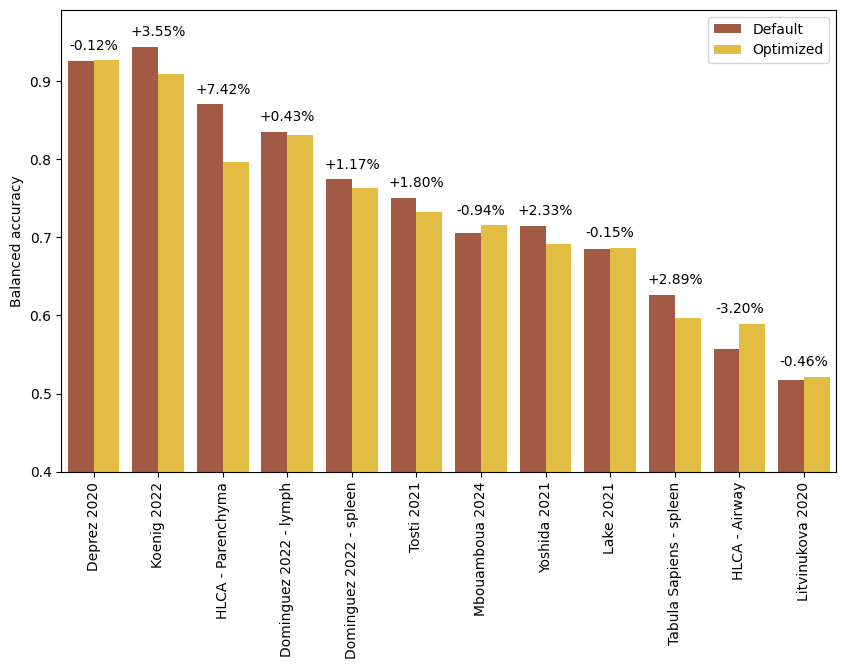

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'Dataset', y = 'Balanced accuracy', hue = 'Opti', hue_order =['Default', 'Optimized'], 
            data = res_toplot, ax = ax, palette = ["#B15236", "#feca28"])

for i, dataset in enumerate(df_diff["Dataset"]):
    permutation_value = df_diff.loc[df_diff["Dataset"] == dataset, "Default"].values[0]
    no_permutation_value = df_diff.loc[df_diff["Dataset"] == dataset, "Optimized"].values[0]
    difference = df_diff.loc[df_diff["Dataset"] == dataset, "Difference"].values[0]
    
    diff_text = f'{difference:+.2f}%'
    
    ax.text(i, max(permutation_value, no_permutation_value) + 0.01, diff_text, 
            ha='center', va='bottom', color='black')
ax.legend().set_title('')
ax.set_ylim(bottom= 0.4)
plt.xticks(rotation = 90)
ax.set_xlabel(f'')
ax.get_figure().savefig(fig_dir + '/default_config.png', dpi=300)

# Effect of the training scheme

In [ ]:
#from notebook_tools import load_run_df
#runs_table_df = load_run_df('task1')
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'

split = 'test'
met = 'balanced_acc'

In [ ]:
test_fold_selection = load_json(working_dir + 'experiment_script/benchmark/hp_test_folds')
test_obs = load_json(working_dir + 'experiment_script/benchmark/hp_test_obs')

In [ ]:
# runs_table_df = pd.read_csv('/home/acollin/scPermut/analysis_notebooks/t1_tempo.csv', index_col = 0)

In [ ]:
from neptune.utils import stringify_unsupported

In [ ]:
from PIL import ImageColor
def hex2rgb(hexcode):
    return np.array(ImageColor.getcolor(hexcode, "RGB"))

colors = {'scPermut':"#B15236",
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}

col = [hex2rgb(i) for i in colors.values()]

In [ ]:
datasets = ['tosti_2021','yoshida_2021', 'htap',  'ajrccm_by_batch',"lake_2021"] 

In [ ]:
tr_sc_order_rename_old = {#'training_scheme_12':'A+/C-',
                      # 'training_scheme_17':'AC+/C-',
                      'training_scheme_23':'F+',
                      'training_scheme_13':'F+/C',
                      'training_scheme_6' : 'D+/F+',
                      'training_scheme_8': 'D+/F-/C',
                      'training_scheme_11':'D+/F-/C/F+/C',
                      # 'training_scheme_22':'A+/D+/F-/C',
                      # 'training_scheme_7' : 'D+/F-',
                      # 'training_scheme_4': 'D-/A+/C',
                      # 'training_scheme_9': 'D-/F+/C',
                      # 'training_scheme_16':'D+/F+/C-',
                      # 'training_scheme_15':'D+train/F-/C-',
                      'training_scheme_24':'F-',
                      'training_scheme_14':'F-/C',
                      'training_scheme_5' : 'D-/F-',
                      'training_scheme_19':'D-/F-/C',
                      # 'training_scheme_20':'D-semi/F-/C-',                     
                      'training_scheme_18':'Autoclass-like (AC-/C)',
                      'training_scheme_25':'scNym-like (CD)'}


tr_sc_order_rename = {#'training_scheme_12':'A+/C-',
                      # 'training_scheme_17':'AC+/C-',
                      'training_scheme_24':'F- (NoPerm)',
                      'training_scheme_14':'F-/C (NoPerm)',
                      'training_scheme_5' : 'D-/F- (NoPerm)',
                      'training_scheme_19':'D-/F-/C (NoPerm)',
                      'training_scheme_23':'F+ (Perm)',
                      'training_scheme_13':'F+/C (Perm)',
                      'training_scheme_6' : 'D+/F+ (Perm)',
                      'training_scheme_8': 'D+/F-/C (Perm)',
                      'training_scheme_11':'D+/F-/C/F+/C (Perm)',
                      # 'training_scheme_22':'A+/D+/F-/C',
                      # 'training_scheme_7' : 'D+/F-',
                      # 'training_scheme_4': 'D-/A+/C',
                      # 'training_scheme_9': 'D-/F+/C',
                      # 'training_scheme_16':'D+/F+/C-',
                      # 'training_scheme_15':'D+train/F-/C-',
                      # 'training_scheme_20':'D-semi/F-/C-',                     
                      'training_scheme_18':'Autoclass-like (AC-/C)',
                      'training_scheme_25':'scNym-like (CD)'}

perm_ts = ['training_scheme_23',
          'training_scheme_13',
          'training_scheme_6' ,
          'training_scheme_8',
          'training_scheme_11']

noperm_ts = ['training_scheme_24',
            'training_scheme_14',
            'training_scheme_5',
            'training_scheme_19']

scanpy_102 = get_scanpy_cmap() # Colors



color_schemes = scanpy_102[:13]

In [ ]:
color_schemes =['#E3B505',
               '#95190C',
                '#610345',
                '#107E7D',
                '#044B7F',]

col1 = ['#E3B505',
       '#95190C',
        '#610345',]

col2 =['#71B48D',
       '#107E7D',
        '#044B7F',]

col_consistent = ['#E8EBE4','#8AD0AA', '#5FBF8A', '#40A06B', '#296644']
import matplotlib.colors as mcolors
n_colors = len(tr_sc_order_rename)
def extrapolate_colors(col_list, n_col):
    cmap = mcolors.LinearSegmentedColormap.from_list("my_palette", col_list)
    col_list = [cmap(i / (n_colors - 1)) for i in range(n_colors)]
    return col_list

In [ ]:
# All over the place
color_schemes = extrapolate_colors(color_schemes, n_colors)


In [ ]:
# Highlight the scheme we use & the no perm schemes
color_schemes = extrapolate_colors(col_consistent, n_colors)
color_schemes[3] = '#B15236'
color_schemes[-1] = '#8789C0'
color_schemes[-2] = '#8789C0'
color_schemes[-3] = '#B8BACF'
color_schemes[-4] = '#B8BACF'
color_schemes[-5] = '#B8BACF'
color_schemes[-6] = '#B8BACF'

# color_schemes[-4] = '#B8BACF'

In [ ]:
import matplotlib.pyplot as plt

# Définir les couleurs pastels
color_schemes = [
     "#dcedc1", "#c5e1a5","#8AD0AA", # Vert
     "#B15236","#ff8a80",        # Rouge
      "#80deea","#b3e5fc", "#bbdefb","#c5cae9", # Bleu
    "#f8bbd0" ,"#f48fb1",             # Rose
]

In [ ]:
perm_ts = ['training_scheme_23',
          'training_scheme_13',
          'training_scheme_6' ,
          'training_scheme_8',
          'training_scheme_11']

noperm_ts = ['training_scheme_24',
            'training_scheme_14',
            'training_scheme_5',
            'training_scheme_19']
res = pd.DataFrame(columns = [True, False])
for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000').query("model == 'scPermut_default'")
    task_1 = task_1.loc[task_1['training_scheme'].isin(perm_ts + noperm_ts),:]
    task_1['isperm'] = task_1['training_scheme'].isin(perm_ts)
    score = task_1.groupby('isperm')[f'{split}_{met}'].agg('mean')
    
    res.loc[dataset_name,:] = score.transpose()
    # mean_perm = task_1.loc[task_1['isperm'],:].groupby('training_scheme')[f'{split}_{met}'].agg('mean')
    # mean_noperm = task_1.loc[~task_1['isperm'],:].groupby('training_scheme')[f'{split}_{met}'].agg('mean')


In [ ]:
res.rename(index = aestetic_data_name,columns = {True:'Permutation', False:'No Permutation'}).to_csv(f'{fig_dir}task_1/training_schemes/permutation_effect.csv')

In [ ]:
res = pd.read_csv(f'{fig_dir}task_1/training_schemes/permutation_effect.csv', index_col = 0)

In [ ]:
res['Dataset'] = res.index

In [ ]:
res = res.loc[['Deprez 2020', 'Tosti 2021', 'Yoshida 2021', 'Mbouamboua 2024',  'Lake 2021'],:]

In [ ]:
res_toplot = pd.melt(res, id_vars=["Dataset"], var_name="Permutation", value_name="Balanced accuracy")
res_toplot['Dataset'] = pd.Categorical(res_toplot['Dataset'], categories = ['Deprez 2020', 'Tosti 2021', 'Yoshida 2021', 'Mbouamboua 2024',  'Lake 2021'])

In [ ]:
df_diff = res.copy()
df_diff['Difference'] = df_diff['Permutation'] - df_diff['No Permutation']
df_diff['Difference'] = df_diff['Difference'] * 100

## Supp Figure perm vs no perm

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'Dataset', y = 'Balanced accuracy', hue = 'Permutation', data = res_toplot, ax = ax, palette = ["#B15236", "#80deea"])

for i, dataset in enumerate(df_diff["Dataset"]):
    permutation_value = df_diff.loc[df_diff["Dataset"] == dataset, "Permutation"].values[0]
    no_permutation_value = df_diff.loc[df_diff["Dataset"] == dataset, "No Permutation"].values[0]
    difference = df_diff.loc[df_diff["Dataset"] == dataset, "Difference"].values[0]
    
    diff_text = f'{difference:+.2f}%'
    
    ax.text(i, max(permutation_value, no_permutation_value) + 0.01, diff_text, 
            ha='center', va='bottom', color='black')
ax.legend().set_title('')
ax.set_ylim(bottom= 0.6)
ax.set_xlabel(f'')
ax.get_figure().savefig(fig_dir + '/permutation_effect.png')

In [ ]:
datasets

## Supp Figure Comparison of training schemes

In [ ]:
n_lines = len(datasets)
f, axes = plt.subplots(n_lines, 3, figsize = (25,5*n_lines))
i=0

show_legend = False

for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000').query("model == 'scPermut_default'")

    bplot1 = axes[i,0]
    bplot2 = axes[i,1]
    bplot3 = axes[i,2]    
    
    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)
    
        
    sns.boxplot(x = 'model',y =f'{split}_{met}', hue = 'training_scheme', data = task_1, ax = bplot1, hue_order = list(tr_sc_order_rename.values()),palette = sns.color_palette(color_schemes[:n_colors]))
    bplot1.tick_params(axis='x', rotation=0)
    if i == 0:
        bplot1.set_title('Balanced accuracy on the test dataset')
    if i != n_lines:
        bplot1.set_xlabel('')
    if i == n_lines:
        bplot1.set_xlabel('Model')
    bplot1.set_xticks([])
    bplot1.set_ylabel(f'{aestetic_data_name[dataset_name]}')
    bplot1.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    sub =task_1[['training_scheme', 'test_fold_nb',f'{split}_{met}', f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}']]
    sub = pd.melt(sub, id_vars = 'training_scheme', value_vars = [f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}'])
    sub = sub.replace({f'{split}_xxsmall_{met}' : '<0.1%',f'{split}_small_{met}':'<1%', f'{split}_medium_{met}':'<10%',f'{split}_large_{met}':'>10%'})
    
    # sns.lineplot(data=sub, x="variable", y="value", hue = 'model', hue_order = colors.keys(),ax = bplot2,palette = sns.color_palette(colors.values()), markers = True)
    # if dataset_name in ['tran_2021',aestetic_data_name['tran_2021'], 
    if dataset_name in ['hlca_trac_dataset_harmonized', aestetic_data_name['hlca_trac_dataset_harmonized']]:
        ord =  ['<1%','<10%','>10%']
    elif dataset_name in ['lake_2021', aestetic_data_name['lake_2021']]:
        ord =  ['<0.1%','<1%','<10%']
    else :
        ord = ['<0.1%','<1%','<10%','>10%']
            
    sns.boxplot(x='variable',y ='value',hue = 'training_scheme',order = ord, data = sub,ax = bplot2, hue_order = list(tr_sc_order_rename.values()), palette = sns.color_palette(color_schemes[:n_colors]))
    bplot2.tick_params(axis='x', rotation=0)
    bplot2.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    if i == 0:
        bplot2.set_title('Balanced accuracy on the test dataset split by celltype sizes')
    if i != n_lines:
        bplot2.set_xlabel('')
    if i == n_lines :
        bplot2.set_xlabel('Celltype size')
    
    bplot2.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    sns.boxplot(x = 'model',y =f'full_batch_mixing_entropy', hue = 'training_scheme', data = task_1, ax = bplot3, hue_order = list(tr_sc_order_rename.values()), palette = sns.color_palette(color_schemes[:n_colors]))
    bplot3.tick_params(axis='x', rotation=0)
    if i == 0:
        bplot3.set_title('Batch mixing entropy the whole dataset')
    if i != n_lines:
        bplot3.set_xlabel('')
    if i == n_lines:
        bplot3.set_xlabel('Model')
    bplot3.set_ylabel('BE')
    bplot3.set_xlabel('')
    bplot3.set_xticks([])

    bplot3.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    i+=1

    if not show_legend: 
        bplot1.get_legend().set_visible(False)
        bplot2.get_legend().set_visible(False)
        #bplot3.get_legend().set_visible(False)

plt.tight_layout()
f.savefig(f'{fig_dir}task_1/training_schemes/prediction_boxplot_{len(datasets)}_datasets.png', transparent=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns # Assuming you still need these for context, though not directly for table generation
import matplotlib.pyplot as plt # Same as above

# --- Assuming these variables are already defined in your environment ---
# datasets = ['dataset1', 'dataset2', ...] # List of dataset names
# runs_table_df = pd.DataFrame(...) # Your DataFrame containing the experimental results
# test_fold_selection = {'dataset1': fold_nb1, 'dataset2': fold_nb2, ...}
# tr_sc_order_rename = {'original_scheme1': 'Renamed Scheme 1', ...}
# split = 'test' # or 'val' depending on what 'met' refers to
# met = 'balanced_accuracy' # or 'accuracy', etc.
# aestetic_data_name = {'dataset1': 'Dataset 1 Aesthetic Name', ...}
# ---------------------------------------------------------------------

# Initialize a dictionary to store all results
all_results = {}

for dataset_name in datasets:
    # Filter for the relevant data for the current dataset, same as your plot
    task_1 = runs_table_df.query("task == 'task_1'") \
                          .query(f"dataset_name == '{dataset_name}'") \
                          .query(f"test_fold_nb == {test_fold_selection[dataset_name]}") \
                          .query('deprecated_status == False') \
                          .query('use_hvg == 3000') \
                          .query("model == 'scPermut_default'")

    # Apply training_scheme renaming
    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)

    # --- Metrics for Column 1: Balanced accuracy on the test dataset ---
    # Group by training_scheme and calculate stats for the primary metric
    metric_col1_name = f'{split}_{met}'
    stats_col1 = task_1.groupby('training_scheme')[metric_col1_name].agg(
        median='median',
        mean='mean',
        variance='var',
        std='std' # Standard deviation is also often useful
    ).reset_index()
    stats_col1.rename(columns={metric_col1_name: 'Value'}, inplace=True)
    stats_col1['Metric'] = f'{metric_col1_name} (Overall)'
    stats_col1['Dataset'] = aestetic_data_name[dataset_name]


    # --- Metrics for Column 2: Balanced accuracy on the test dataset split by celltype sizes ---
    # Melt the data first, similar to how you prepared it for the plot
    sub_melted = task_1[['training_scheme', f'{split}_xxsmall_{met}', f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}']]
    sub_melted = pd.melt(sub_melted, id_vars='training_scheme',
                         value_vars=[f'{split}_xxsmall_{met}', f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}'])
    sub_melted['variable'] = sub_melted['variable'].replace({
        f'{split}_xxsmall_{met}': '<0.1%',
        f'{split}_small_{met}': '<1%',
        f'{split}_medium_{met}': '<10%',
        f'{split}_large_{met}': '>10%'
    })

    # Group by training_scheme and celltype size category, then calculate stats
    stats_col2 = sub_melted.groupby(['training_scheme', 'variable'])['value'].agg(
        median='median',
        mean='mean',
        variance='var',
        std='std'
    ).reset_index()
    stats_col2.rename(columns={'variable': 'Celltype Size Category', 'value': 'Value'}, inplace=True)
    stats_col2['Metric'] = f'{metric_col1_name} (Celltype Size)'
    stats_col2['Dataset'] = aestetic_data_name[dataset_name]


    # --- Metrics for Column 3: Batch mixing entropy the whole dataset ---
    # Group by training_scheme and calculate stats for batch mixing entropy
    metric_col3_name = 'full_batch_mixing_entropy'
    stats_col3 = task_1.groupby('training_scheme')[metric_col3_name].agg(
        median='median',
        mean='mean',
        variance='var',
        std='std'
    ).reset_index()
    stats_col3.rename(columns={metric_col3_name: 'Value'}, inplace=True)
    stats_col3['Metric'] = f'{metric_col3_name} (Overall)'
    stats_col3['Dataset'] = aestetic_data_name[dataset_name]

    # Store results for the current dataset
    all_results[dataset_name] = {
        'overall_accuracy': stats_col1,
        'celltype_accuracy': stats_col2,
        'batch_mixing_entropy': stats_col3
    }

# --- Combine all results into a single DataFrame for easier viewing/export ---
# You might want to combine them differently based on how you want the final table to look.
# Here's one way to stack them up:

combined_df_list = []
for dataset, data_dict in all_results.items():
    for metric_type, df in data_dict.items():
        combined_df_list.append(df)

final_stats_df = pd.concat(combined_df_list, ignore_index=True)

# You can now print this DataFrame or export it to CSV/Excel/LaTeX
print("--- Combined Statistics DataFrame ---")
print(final_stats_df)

# Example: To view stats for a specific dataset and metric
# print("\n--- Example: Stats for Dataset 1, Overall Accuracy ---")
# print(all_results['dataset1']['overall_accuracy'])

# Example: Export to CSV
# final_stats_df.to_csv('training_scheme_stats.csv', index=False)

# Example: For LaTeX table (requires specific formatting)
# You'd typically need to pivot or reshape final_stats_df to get the desired LaTeX table layout.
# For instance, if you want a table per dataset, or a table per metric across datasets.
# Example for a simple LaTeX table of overall accuracy:
# latex_table = all_results[datasets[0]]['overall_accuracy'].to_latex(index=False, float_format="%.3f")
# print("\n--- Example LaTeX Table (First Dataset, Overall Accuracy) ---")
# print(latex_table)

In [ ]:
output_dir = f'{fig_dir}task_1/training_schemes/'
output_filename_csv = 'training_scheme_summary_stats.csv'
output_path_csv = output_dir + output_filename_csv

final_stats_df.to_csv(output_path_csv, index=False) # index=False prevents writing the DataFrame index as a column

print(f"Statistics saved to: {output_path_csv}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Assumed Variables (make sure these are defined from your previous code) ---
# runs_table_df: Your main DataFrame with all experimental runs.
# datasets: List of dataset names.
# test_fold_selection: Dictionary mapping dataset to its selected test fold.
# tr_sc_order_rename: Dictionary for renaming training schemes.
# split: 'test' or 'val' (e.g., 'test').
# met: The metric name (e.g., 'balanced_accuracy').
# aestetic_data_name: Dictionary for aesthetic dataset names.
# color_schemes: List of colors for plotting.
# n_colors: Number of colors to use from color_schemes.
# fig_dir: Directory for saving figures.
# -----------------------------------------------------------------------------

# Re-run the statistics calculation to ensure final_stats_df is up-to-date
# This block is copied from our previous conversation
all_results = {}
for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'") \
                          .query(f"dataset_name == '{dataset_name}'") \
                          .query(f"test_fold_nb == {test_fold_selection[dataset_name]}") \
                          .query('deprecated_status == False') \
                          .query('use_hvg == 3000') \
                          .query("model == 'scPermut_default'")

    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)

    metric_col1_name = f'{split}_{met}'
    stats_col1 = task_1.groupby('training_scheme')[metric_col1_name].agg(
        median='median',
        mean='mean',
        std='std' # We need standard deviation for CV
    ).reset_index()
    stats_col1['Metric'] = f'{metric_col1_name} (Overall)'
    stats_col1['Dataset'] = aestetic_data_name[dataset_name]

    # Calculate Coefficient of Variation (CV)
    # CV = (Standard Deviation / Mean) * 100%
    stats_col1['CV'] = (stats_col1['std'] / stats_col1['mean']) * 100
    all_results[dataset_name] = {'overall_accuracy_stats': stats_col1}

combined_df_list = []
for dataset, data_dict in all_results.items():
    combined_df_list.append(data_dict['overall_accuracy_stats'])
final_stats_df = pd.concat(combined_df_list, ignore_index=True)


# --- Plotting the Coefficient of Variation ---

# Filter for only the relevant metric (e.g., 'test_balanced_accuracy (Overall)')
cv_data = final_stats_df[final_stats_df['Metric'] == f'{split}_{met} (Overall)']

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=cv_data,
    x='training_scheme',
    y='CV',
    hue='training_scheme', # Hue by training scheme to get different colors
    palette=sns.color_palette(color_schemes[:n_colors]),
    order=list(tr_sc_order_rename.values()), # Ensure consistent order
    errorbar=None # No error bars as we are plotting a calculated stat
)

plt.title(f'Coefficient of Variation of {met.replace("_", " ").title()} Across Datasets by Training Scheme')
plt.xlabel('Training Scheme')
plt.ylabel('Coefficient of Variation (%)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Training Scheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plot_filename = f'{fig_dir}task_1/training_schemes/cv_balanced_accuracy_overall_training_schemes.png'
plt.savefig(plot_filename, transparent=False, dpi=300)
print(f"Plot saved to: {plot_filename}")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Assumed Variables (make sure these are defined from your previous code) ---
# runs_table_df: Your main DataFrame with all experimental runs.
# datasets: List of dataset names.
# test_fold_selection: Dictionary mapping dataset to its selected test fold.
# tr_sc_order_rename: Dictionary for renaming training schemes.
# split: 'test' or 'val' (e.g., 'test').
# met: The metric name (e.g., 'balanced_accuracy').
# aestetic_data_name: Dictionary for aesthetic dataset names.
# color_schemes: List of colors for plotting.
# n_colors: Number of colors to use from color_schemes.
# fig_dir: Directory for saving figures.
# -----------------------------------------------------------------------------

# Re-run the statistics calculation to ensure final_stats_df is up-to-date
# This block is copied from our previous conversation, ensuring 'std' is calculated
all_results = {}
for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'") \
                          .query(f"dataset_name == '{dataset_name}'") \
                          .query(f"test_fold_nb == {test_fold_selection[dataset_name]}") \
                          .query('deprecated_status == False') \
                          .query('use_hvg == 3000') \
                          .query("model == 'scPermut_default'")

    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)

    metric_col1_name = f'{split}_{met}'
    stats_col1 = task_1.groupby('training_scheme')[metric_col1_name].agg(
        median='median',
        mean='mean',
        std='std' # Standard deviation is explicitly calculated here
    ).reset_index()
    stats_col1['Metric'] = f'{metric_col1_name} (Overall)'
    stats_col1['Dataset'] = aestetic_data_name[dataset_name]

    all_results[dataset_name] = {'overall_accuracy_stats': stats_col1}

combined_df_list = []
for dataset, data_dict in all_results.items():
    combined_df_list.append(data_dict['overall_accuracy_stats'])
final_stats_df = pd.concat(combined_df_list, ignore_index=True)


# --- Plotting the Standard Deviation ---

# Filter for only the relevant metric (e.g., 'test_balanced_accuracy (Overall)')
std_data = final_stats_df[final_stats_df['Metric'] == f'{split}_{met} (Overall)']

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=std_data,
    x='training_scheme',
    y='std', # Use the 'std' column directly
    hue='training_scheme', # Hue by training scheme to get different colors
    palette=sns.color_palette(color_schemes[:n_colors]),
    order=list(tr_sc_order_rename.values()), # Ensure consistent order
    errorbar=None # No error bars as we are plotting a calculated stat
)

plt.title(f'Standard Deviation of {met.replace("_", " ").title()} Across Datasets by Training Scheme')
plt.xlabel('Training Scheme')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Training Scheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plot_filename = f'{fig_dir}task_1/training_schemes/std_balanced_accuracy_overall_training_schemes.png'
plt.savefig(plot_filename, transparent=False, dpi=300)
print(f"Plot saved to: {plot_filename}")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Assumed Variables (make sure these are defined from your previous code) ---
# runs_table_df: Your main DataFrame with all experimental runs.
# datasets: List of dataset names.
# test_fold_selection: Dictionary mapping dataset to its selected test fold.
# tr_sc_order_rename: Dictionary for renaming training schemes.
# split: 'test' or 'val' (e.g., 'test'). This might not be directly used for BME but kept for consistency.
# met: The metric name (e.g., 'balanced_accuracy'). This might not be directly used for BME but kept for consistency.
# aestetic_data_name: Dictionary for aesthetic dataset names.
# color_schemes: List of colors for plotting.
# n_colors: Number of colors to use from color_schemes.
# fig_dir: Directory for saving figures.
# -----------------------------------------------------------------------------

# Re-run the statistics calculation, focusing on Batch Mixing Entropy
all_results = {}
for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'") \
                          .query(f"dataset_name == '{dataset_name}'") \
                          .query(f"test_fold_nb == {test_fold_selection[dataset_name]}") \
                          .query('deprecated_status == False') \
                          .query('use_hvg == 3000') \
                          .query("model == 'scPermut_default'")

    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)

    # Focus on 'full_batch_mixing_entropy' for this plot
    metric_bme_name = 'full_batch_mixing_entropy'
    stats_bme = task_1.groupby('training_scheme')[metric_bme_name].agg(
        median='median',
        mean='mean',
        std='std' # Standard deviation is explicitly calculated here
    ).reset_index()
    stats_bme['Metric'] = f'{metric_bme_name} (Overall)'
    stats_bme['Dataset'] = aestetic_data_name[dataset_name]

    all_results[dataset_name] = {'batch_mixing_entropy_stats': stats_bme}

combined_df_list = []
for dataset, data_dict in all_results.items():
    combined_df_list.append(data_dict['batch_mixing_entropy_stats'])
final_stats_df_bme = pd.concat(combined_df_list, ignore_index=True)


# --- Plotting the Standard Deviation of Batch Mixing Entropy ---

# Filter for only the relevant metric ('full_batch_mixing_entropy (Overall)')
std_bme_data = final_stats_df_bme[final_stats_df_bme['Metric'] == 'full_batch_mixing_entropy (Overall)']

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=std_bme_data,
    x='training_scheme',
    y='std', # Use the 'std' column directly
    hue='training_scheme', # Hue by training scheme to get different colors
    palette=sns.color_palette(color_schemes[:n_colors]),
    order=list(tr_sc_order_rename.values()), # Ensure consistent order
    errorbar=None # No error bars as we are plotting a calculated stat
)

plt.title(f'Standard Deviation of Batch Mixing Entropy Across Datasets by Training Scheme')
plt.xlabel('Training Scheme')
plt.ylabel('Standard Deviation of Batch Mixing Entropy')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Training Scheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plot_filename = f'{fig_dir}task_1/training_schemes/std_batch_mixing_entropy_overall_training_schemes.png'
plt.savefig(plot_filename, transparent=False, dpi=300)
print(f"Plot saved to: {plot_filename}")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Assumed Variables (make sure these are defined from your previous code) ---
# runs_table_df: Your main DataFrame with all experimental runs.
# datasets: List of dataset names.
# test_fold_selection: Dictionary mapping dataset to its selected test fold.
# tr_sc_order_rename: Dictionary for renaming training schemes.
# split: 'test' or 'val' (e.g., 'test').
# met: The metric name (e.g., 'balanced_accuracy').
# aestetic_data_name: Dictionary for aesthetic dataset names.
# color_schemes: List of colors for plotting.
# n_colors: Number of colors to use from color_schemes.
# fig_dir: Directory for saving figures.
# -----------------------------------------------------------------------------

# Re-run the statistics calculation, focusing on celltype-split accuracy
all_results = {}
for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'") \
                          .query(f"dataset_name == '{dataset_name}'") \
                          .query(f"test_fold_nb == {test_fold_selection[dataset_name]}") \
                          .query('deprecated_status == False') \
                          .query('use_hvg == 3000') \
                          .query("model == 'scPermut_default'")

    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)

    metric_col1_name = f'{split}_{met}' # e.g., 'test_balanced_accuracy'

    # Melt the data first, similar to how you prepared it for the plot
    sub_melted = task_1[['training_scheme', f'{split}_xxsmall_{met}', f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}']]
    sub_melted = pd.melt(sub_melted, id_vars='training_scheme',
                         value_vars=[f'{split}_xxsmall_{met}', f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}'])
    sub_melted['variable'] = sub_melted['variable'].replace({
        f'{split}_xxsmall_{met}': '<0.1%',
        f'{split}_small_{met}': '<1%',
        f'{split}_medium_{met}': '<10%',
        f'{split}_large_{met}': '>10%'
    })

    # Group by training_scheme and celltype size category, then calculate std
    stats_col2 = sub_melted.groupby(['training_scheme', 'variable'])['value'].agg(
        median='median', # Keeping for consistency in output DataFrame, though not plotted
        mean='mean',     # Keeping for consistency
        std='std'        # Standard deviation is what we want to plot
    ).reset_index()
    stats_col2.rename(columns={'variable': 'Celltype Size Category', 'value': 'Value'}, inplace=True)
    stats_col2['Metric'] = f'{metric_col1_name} (Celltype Size)'
    stats_col2['Dataset'] = aestetic_data_name[dataset_name] # Keep dataset info if needed for future agg

    all_results[dataset_name] = {'celltype_accuracy_stats': stats_col2}

# Concatenate all celltype-specific results from all datasets
# This will give us the std for each training scheme per celltype category, across all datasets
combined_celltype_df_list = []
for dataset, data_dict in all_results.items():
    combined_celltype_df_list.append(data_dict['celltype_accuracy_stats'])
final_celltype_stats_df = pd.concat(combined_celltype_df_list, ignore_index=True)

# Now, to get the overall standard deviation *across datasets* for each
# training scheme and celltype category, we need to group again.
# The 'std' in `final_celltype_stats_df` is the std within a dataset for each fold.
# We want the std *of these stds across datasets*, or ideally, group by
# training scheme and celltype category and compute std of the 'value' before the first aggregation.

# Let's re-think this. We want the std of the balanced accuracy, grouped by
# training scheme AND celltype size category, across ALL relevant runs.
# This means we should re-melt the original filtered 'task_1' data once for all datasets,
# and then compute the final stats.

# Re-aggregating more cleanly for the specific plot:
# First, filter and rename directly from the original runs_table_df for all datasets.
plot_data_prep = []
for dataset_name in datasets:
    task_1_subset = runs_table_df.query("task == 'task_1'") \
                                 .query(f"dataset_name == '{dataset_name}'") \
                                 .query(f"test_fold_nb == {test_fold_selection[dataset_name]}") \
                                 .query('deprecated_status == False') \
                                 .query('use_hvg == 3000') \
                                 .query("model == 'scPermut_default'")

    task_1_subset['training_scheme'] = task_1_subset['training_scheme'].replace(tr_sc_order_rename)
    task_1_subset['dataset_aesthetic_name'] = aestetic_data_name[dataset_name] # Keep track of dataset

    # Melt for celltype sizes
    melted_for_celltype_std = task_1_subset[['training_scheme', 'dataset_aesthetic_name',
                                            f'{split}_xxsmall_{met}', f'{split}_small_{met}',
                                            f'{split}_medium_{met}', f'{split}_large_{met}']]
    melted_for_celltype_std = pd.melt(melted_for_celltype_std, id_vars=['training_scheme', 'dataset_aesthetic_name'],
                                     value_vars=[f'{split}_xxsmall_{met}', f'{split}_small_{met}',
                                                 f'{split}_medium_{met}', f'{split}_large_{met}'])
    melted_for_celltype_std['variable'] = melted_for_celltype_std['variable'].replace({
        f'{split}_xxsmall_{met}': '<0.1%',
        f'{split}_small_{met}': '<1%',
        f'{split}_medium_{met}': '<10%',
        f'{split}_large_{met}': '>10%'
    })
    plot_data_prep.append(melted_for_celltype_std)

# Concatenate all prepared data across datasets
full_celltype_data = pd.concat(plot_data_prep, ignore_index=True)

# Now, calculate the standard deviation for each training scheme *and* celltype size category
# across all runs (which includes different test folds and different datasets)
std_celltype_stats = full_celltype_data.groupby(['training_scheme', 'variable'])['value'].agg(
    std_value='std' # The standard deviation we want to plot
).reset_index()

# Define the order for celltype size categories for consistent plotting
# This order logic should match what you used in your original plotting code
celltype_size_order = ['<0.1%', '<1%', '<10%', '>10%'] # Default order
# You might need to adjust this based on the specific dataset names if they triggered a different order in your original code
# For example, if 'hlca_trac_dataset_harmonized' or 'lake_2021' logic needs to apply here:
# If you only want to plot the STD for specific datasets, you'd filter `full_celltype_data` by `dataset_aesthetic_name` first.
# Assuming you want to show the std across all datasets for these categories.

# --- Plotting the Standard Deviation for Celltype Sizes ---

plt.figure(figsize=(14, 8)) # Adjust figure size as it will have more bars
sns.barplot(
    data=std_celltype_stats,
    x='variable', # Celltype size category on x-axis
    y='std_value', # Standard deviation on y-axis
    hue='training_scheme', # Separate bars for each training scheme
    order=[cat for cat in celltype_size_order if cat in std_celltype_stats['variable'].unique()], # Ensure order and only include existing categories
    hue_order=list(tr_sc_order_rename.values()), # Consistent order for hue
    palette=sns.color_palette(color_schemes[:n_colors]),
    errorbar=None # Plotting a calculated standard deviation
)

plt.title(f'Standard Deviation of {met.replace("_", " ").title()} by Celltype Size Across Datasets')
plt.xlabel('Celltype Size Category')
plt.ylabel(f'Standard Deviation of {met.replace("_", " ").title()}')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Training Scheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plot_filename = f'{fig_dir}task_1/training_schemes/std_{met}_by_celltype_size_training_schemes.png'
plt.savefig(plot_filename, transparent=False, dpi=300)
print(f"Plot saved to: {plot_filename}")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Assumed Variables (make sure these are defined from your previous code) ---
# runs_table_df: Your main DataFrame with all experimental runs.
# datasets: List of dataset names.
# test_fold_selection: Dictionary mapping dataset to its selected test fold.
# tr_sc_order_rename: Dictionary for renaming training schemes.
# split: 'test' or 'val' (e.g., 'test').
# met: The metric name (e.g., 'balanced_accuracy').
# aestetic_data_name: Dictionary for aesthetic dataset names.
# color_schemes: List of colors for plotting.
# n_colors: Number of colors to use from color_schemes.
# fig_dir: Directory for saving figures.
# -----------------------------------------------------------------------------

# Re-run the statistics calculation to ensure final_stats_df is up-to-date
# This block is copied from our previous conversation, ensuring 'median' is calculated
all_results = {}
for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'") \
                          .query(f"dataset_name == '{dataset_name}'") \
                          .query(f"test_fold_nb == {test_fold_selection[dataset_name]}") \
                          .query('deprecated_status == False') \
                          .query('use_hvg == 3000') \
                          .query("model == 'scPermut_default'")

    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)

    metric_col1_name = f'{split}_{met}'
    stats_col1 = task_1.groupby('training_scheme')[metric_col1_name].agg(
        median='median', # Median is explicitly calculated here
        mean='mean',
        std='std'
    ).reset_index()
    stats_col1['Metric'] = f'{metric_col1_name} (Overall)'
    stats_col1['Dataset'] = aestetic_data_name[dataset_name]

    all_results[dataset_name] = {'overall_accuracy_stats': stats_col1}

combined_df_list = []
for dataset, data_dict in all_results.items():
    combined_df_list.append(data_dict['overall_accuracy_stats'])
final_stats_df = pd.concat(combined_df_list, ignore_index=True)


# --- Plotting the Median ---

# Filter for only the relevant metric (e.g., 'test_balanced_accuracy (Overall)')
median_data = final_stats_df[final_stats_df['Metric'] == f'{split}_{met} (Overall)']

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=median_data,
    x='training_scheme',
    y='median', # Use the 'median' column directly
    hue='training_scheme', # Hue by training scheme to get different colors
    palette=sns.color_palette(color_schemes[:n_colors]),
    order=list(tr_sc_order_rename.values()), # Ensure consistent order
    errorbar=None # No error bars as we are plotting a calculated stat
)

plt.title(f'Median of {met.replace("_", " ").title()} Across Datasets by Training Scheme')
plt.xlabel('Training Scheme')
plt.ylabel(f'Median {met.replace("_", " ").title()}')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Training Scheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plot_filename = f'{fig_dir}task_1/training_schemes/median_balanced_accuracy_overall_training_schemes.png'
plt.savefig(plot_filename, transparent=False, dpi=300)
print(f"Plot saved to: {plot_filename}")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- REQUIRED VARIABLES (ENSURE THESE ARE DEFINED IN YOUR ENVIRONMENT) ---
# Example placeholders - REPLACE WITH YOUR ACTUAL DATA/DEFINITIONS:
# datasets = ['dataset_A', 'dataset_B', 'dataset_C']
# runs_table_df = pd.DataFrame({
#     'task': ['task_1']*30, 'dataset_name': ['dataset_A']*10 + ['dataset_B']*10 + ['dataset_C']*10,
#     'test_fold_nb': list(range(1, 11))*3,
#     'deprecated_status': [False]*30, 'use_hvg': [3000]*30, 'model': ['scPermut_default']*30,
#     'training_scheme': ['D+/F-/C', 'D-/F+/C', 'D+/F+/C_other'] * 10,
#     'full_batch_mixing_entropy': np.random.rand(30), # Example random data
#     'test_balanced_accuracy': np.random.rand(30) # Example random data
# })
# test_fold_selection = {'dataset_A': 1, 'dataset_B': 1, 'dataset_C': 1}
# tr_sc_order_rename = {'D+/F-/C': 'Scheme A', 'D-/F+/C': 'Scheme B', 'D+/F+/C_other': 'Scheme C'}
# aestetic_data_name = {'dataset_A': 'Dataset Alpha', 'dataset_B': 'Dataset Beta', 'dataset_C': 'Dataset Gamma'}
# color_schemes = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# n_colors = len(tr_sc_order_rename)
# fig_dir = './figures/'
# split = 'test'
# met = 'balanced_accuracy'
# -------------------------------------------------------------------------


# Re-run the statistics calculation, focusing on Batch Mixing Entropy median
all_results = {}
for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'") \
                          .query(f"dataset_name == '{dataset_name}'") \
                          .query(f"test_fold_nb == {test_fold_selection[dataset_name]}") \
                          .query('deprecated_status == False') \
                          .query('use_hvg == 3000') \
                          .query("model == 'scPermut_default'")

    # Ensure the training scheme names match what you expect in the plot
    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)

    # Focus on 'full_batch_mixing_entropy' for this plot
    metric_bme_name = 'full_batch_mixing_entropy'
    stats_bme = task_1.groupby('training_scheme')[metric_bme_name].agg(
        median='median', # Median is explicitly calculated here
        mean='mean',
        std='std'
    ).reset_index()
    stats_bme['Metric'] = f'{metric_bme_name} (Overall)'
    stats_bme['Dataset'] = aestetic_data_name.get(dataset_name, dataset_name) # Use .get with fallback for safety

    all_results[dataset_name] = {'batch_mixing_entropy_stats': stats_bme}

combined_df_list = []
for dataset, data_dict in all_results.items():
    combined_df_list.append(data_dict['batch_mixing_entropy_stats'])
final_stats_df_bme = pd.concat(combined_df_list, ignore_index=True)


# --- Plotting the Median of Batch Mixing Entropy ---

# Filter for only the relevant metric ('full_batch_mixing_entropy (Overall)')
median_bme_data = final_stats_df_bme[final_stats_df_bme['Metric'] == 'full_batch_mixing_entropy (Overall)']

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=median_bme_data,
    x='training_scheme',
    y='median', # Use the 'median' column directly for the y-axis
    hue='training_scheme', # Hue by training scheme to get different colors
    palette=sns.color_palette(color_schemes[:n_colors]),
    order=list(tr_sc_order_rename.values()), # Ensure consistent order of bars
    errorbar=None # No error bars as we are plotting a calculated stat
)

plt.title(f'Median of Batch Mixing Entropy Across Datasets by Training Scheme')
plt.xlabel('Training Scheme')
plt.ylabel('Median Batch Mixing Entropy')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.legend(title='Training Scheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
# Ensure the directory exists
import os
os.makedirs(f'{fig_dir}task_1/training_schemes/', exist_ok=True)
plot_filename = f'{fig_dir}task_1/training_schemes/median_batch_mixing_entropy_overall_training_schemes.png'
plt.savefig(plot_filename, transparent=False, dpi=300)
print(f"Plot saved to: {plot_filename}")

plt.show()

# Small subtypes

In [ ]:
runs_table_df = load_run_df()
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'


In [ ]:
split = 'test'
met = 'balanced_acc'

In [ ]:
def load_fold_t1(runs_table_df,dataset_name, fold):
    """
    Loads every anndata from one specific fold for one model. Returns a list where the key is the model and the value is the anndata with corresponding latent space and predictions 
    """
    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000')
    task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:]
    task_1 = task_1.query(f"val_fold_nb == {fold}")
    ad_list = {}
    for model in np.unique(task_1['model']):
        # if model == 'scPermut':
        #     sub = task_1.query(f'model == "{model}"').query('training_scheme == "training_scheme_8"')
        # else:
        sub = task_1.query(f'model == "{model}"')
        if not sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].empty :
            fold_id = sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].values[0]
            ad = load_expe(fold_id,working_dir)
            ad_list[model] = ad
    return ad_list


In [ ]:
model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
ad_list = {i: load_fold_t1(runs_table_df,dataset_name, fold=i) for i in range(5)}


## Figure 3 Heatmaps

In [ ]:
# # Generate celltype_df_list for best expe

# celltype_df_list = {}
# split = 'test'
# met = 'balanced_acc'
# model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']

# detection_th = 0.4

# for size in ['xxsmall','small','medium','large']:
#     n_celltypes_df = pd.DataFrame(index = dataset_list, columns = model_list)
#     for dataset_name in dataset_list:
#         ad_list = load_best_t1(runs_table_df, dataset_name)
#         sizes = get_sizes(ad_list)
#         for model in model_list:
#             if model in ad_list:
#                 sub = ad_list[model][ad_list[model].obs['split'] == 'test']
#                 sub_small = sub[sub.obs['true'].isin(sizes[size])]
        
                
#                 conf_mat, conf_mat_prop = plot_confusion_matrix(sub,sub_small, return_mat = True)
#                 detected_ct = np.diag(conf_mat_prop) > detection_th
#                 detected_ct = conf_mat_prop.index[detected_ct]
                
        
#                 n_celltypes_df.loc[dataset_name, model] = len(detected_ct)
#         n_total_ct = len(sizes[size])
#         n_celltypes_df.loc[dataset_name, 'Total'] = n_total_ct
#     print(size)
#     n_celltypes_df = n_celltypes_df.fillna(0)
#     celltype_df_list[size] = n_celltypes_df
#     clust_map = sns.clustermap(n_celltypes_df, annot=True,fmt='g')
#     plt.title(size)

In [ ]:
# # Generate celltype_df_list for average of 5 expe

# from tqdm.notebook import tqdm

# celltype_df_list = {}
# split = 'test'
# met = 'balanced_acc'
# model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']

# detection_th = 0.2
# import warnings
# warnings.filterwarnings('ignore')

# for size in tqdm(['xxsmall','small','medium','large']):
#     n_celltypes_df = pd.DataFrame(index = dataset_list, columns = model_list)
#     for dataset_name in tqdm(dataset_list):
#         print(dataset_name)
#         mega_ad_list = {i: load_fold_t1(runs_table_df,dataset_name, fold=i) for i in range(5)}
#         sizes = get_sizes(mega_ad_list[0])
#         for model in model_list:
#             conf_mat_list = []
#             detection_list = []
#             n_ct_detected = []
#             for i in range(5):
#                 ad_list = mega_ad_list[i]
#                 if model in ad_list:
#                     sub = ad_list[model][ad_list[model].obs['split'] == 'test']
#                     sub_small = sub[sub.obs['true'].isin(sizes[size])]
            
#                     conf_mat, conf_mat_prop = plot_confusion_matrix(sub,sub_small, return_mat = True)
#                     conf_mat_list.append(conf_mat_prop)
#                     ct_detected = pd.Series(np.diag(conf_mat_prop) > detection_th, index =conf_mat_prop.index)
#                     detection_list.append(ct_detected)
#                     n_ct_detected.append(ct_detected.sum())
#             avg_nct_detected = np.mean(n_ct_detected)
#             n_celltypes_df.loc[dataset_name, model] = avg_nct_detected
#             # average_array = pd.Series(np.mean(np.stack(detection_list), axis=0), index = conf_mat_prop.index )
#             #average_array = pd.DataFrame(np.mean(np.stack(conf_mat_list), axis=0),index = conf_mat_list[0].index, columns = conf_mat_list[0].columns)
#             # detected_ct = np.diag(conf_mat_prop) > detection_th
#             # detected_ct = average_array.index[detected_ct]
#         n_total_ct = len(sizes[size])
#         n_celltypes_df.loc[dataset_name, 'Total'] = n_total_ct
#     # n_celltypes_df = n_celltypes_df.fillna(0)
#     celltype_df_list[size] = n_celltypes_df

In [ ]:
# # Saving 

# for s, df in celltype_df_list.items():
#     df.fillna(0)
#     df.to_csv(f'/home/acollin/scPermut/analysis_notebooks/figures/task_1/celltype_size_heatmap_csv/{s}.csv')

In [ ]:
# Start here if already saved. Else run above cells

celltype_df_list = dict()
for s in ['xxsmall', 'small', 'medium', 'large']:
    df = pd.read_csv(f'/home/acollin/scPermut/analysis_notebooks/figures/task_1/celltype_size_heatmap_csv/{s}.csv', index_col = 0)
    df = df.loc[df.index != 'tran_2021',:]
    celltype_df_list[s] = df.copy()

In [ ]:
import matplotlib.colors as mcolors

heatmap_colors = ["lightgray","#FFF7EC", "#FEE8C8", "#FDD49E",
          "#FDBB84", "#FC8D59", "#EF6548" ]#], "#D7301F", "#B30000"]#, "#7F0000"]

cmap = mcolors.LinearSegmentedColormap.from_list("my_palette", heatmap_colors)

In [ ]:
import matplotlib.colors as mcolors
cm_df = celltype_df_list['xxsmall'].copy().fillna(0)
cm_val = cm_df.values
cm_val = cm_val / cm_val.max(axis = 1, keepdims=True)
cm_plot = pd.DataFrame(cm_val, index= cm_df.index, columns = cm_df.columns)

In [ ]:
sc.set_figure_params(dpi=100, figsize=(6,6), scanpy=False, 
                     frameon=False, vector_friendly=False, color_map=None, facecolor=None, transparent=True, ipython_format='png2x')
sns.set_theme(style = "white")
detection_th = 0.2
for size, df in celltype_df_list.items():
    df = df.sort_values(axis = 0,by = 'Total', ascending = False)
    df = df.fillna(0)
    if size == 'xxsmall' :
        df = df.drop(index = ['hlca_trac_dataset_harmonized']) #'tran_2021',
    if size == 'large' :
        df = df.drop(index = 'lake_2021')
    plt.figure()
    df = df.loc[:, list(aestetic_model_name.keys()) + ['Total']]
    df= df.rename(index = aestetic_data_name, columns = aestetic_model_name)
    
    cm_df = df.copy()
    cm_val = cm_df.values 
    cm_val = cm_val / cm_val.max(axis = 1, keepdims=True)# row scaling
    cm_plot = pd.DataFrame(cm_val, index= cm_df.index, columns = cm_df.columns)
    
    f = sns.heatmap(cm_plot, annot=cm_df,fmt='g',annot_kws={"fontsize":10}, linecolor = 'white', cmap = cmap,cbar = False)
    plt.title(size)
    plt.tight_layout()
    f.get_figure().savefig(f'{fig_dir}task_1/celltype_size_heatmap/heatmap_{size}_th_{detection_th}_scaled_colors.png', transparent=False)

    plt.figure()
    f = sns.heatmap(cm_plot, annot=True,fmt='.0%',annot_kws={"fontsize":7}, linecolor = 'white', cmap = cmap,cbar = False)
    plt.title(size)
    plt.tight_layout()
    f.get_figure().savefig(f'{fig_dir}task_1/celltype_size_heatmap/heatmap_{size}_th_{detection_th}_scaled_pct.png', transparent=False)
    
    plt.figure()
    f = sns.heatmap(cm_df, annot=True,fmt='g',annot_kws={"fontsize":10}, linecolor = 'white', cmap = cmap,cbar = False)
    plt.title(size)
    plt.tight_layout()
    f.get_figure().savefig(f'{fig_dir}task_1/celltype_size_heatmap/heatmap_{size}_th_{detection_th}_no_scaling.png', transparent=False)

# Exemples on Lake 2021

In [ ]:
working_dir = '/data/analysis/data_becavin/scMusketeers/'
fig_dir = '/data/analysis/data_becavin/scMusketeers/analysis_notebooks/figures_review/'

In [ ]:
import sys
sys.path.append(working_dir)

In [ ]:
import scmusketeers
from notebook_tools import *

# Setup

In [ ]:
import os
import pandas as pd
task1_path = os.path.join(fig_dir,"task_1.pkl")
if os.path.exists(task1_path):
    runs_table_df = pd.read_pickle(task1_path)    
else:
    runs_table_df = load_run_df("task_1")
    runs_table_df.to_pickle(task1_path)

In [ ]:
runs_table_df

In [ ]:
#runs_table_df = load_run_df('task1')
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'


In [ ]:
dataset_name = 'lake_2021'

adata_list = load_best_model_t1(runs_table_df, 'lake_2021', 'scPermut_default', 'test', 'balanced_acc')
sizes = get_sizes(adata_list)

## Celltype proportions

In [ ]:
lake = adata_list['scPermut_default']
size_df = df_to_dict(dict_to_df(sizes), key_column = 'values', value_column= 'keys', singleton_to_str = True)
ct_prop = list(adata_list.values())[0].obs['true'].value_counts()/ list(adata_list.values())[0].n_obs

In [ ]:
import matplotlib as mpl
from matplotlib.patches import Patch

In [ ]:
# # Barplots, NOT USED IN PAPER

# sns.set_style("ticks",{'axes.linewidth': 0.5})
# f, ax = plt.subplots(figsize = (10,5))
# sns.histplot(lake.obs['true'].value_counts(),  ax=ax, bins = 10, log_scale=True)
# f.set_dpi(200)
# ax.set_xlabel('Celttype size')
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([100, 1000, 10000])
# ax.set_ylabel('Number of celltypes')
# ax.tick_params(axis='x', length = 1, width = 1, size = 4,color ='black')
# for i in range(3):
#     ax.patches[i].set_facecolor('#BBB891')
# for i in range(3, 7):
#     ax.patches[i].set_facecolor('#99B2DD')
# for i in range(7,10):
#     ax.patches[i].set_facecolor('#37505C')
# legend_patches = [
#     Patch(color='#BBB891', label='Tiny (11 celltypes, 567 cells)'),
#     Patch(color='#99B2DD', label='Small (31 celltypes, 14K cells)'),
#     Patch(color='#37505C', label='Medium (32 cellsypes, 90K cells)' )
# ]

# # Ajouter la légende personnalisée
# plt.legend(handles=legend_patches,frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# f.savefig(working_dir + 'analysis_notebooks/figures/lake_ct_prop.png')



In [ ]:
save_p = '/home/acollin/scPermut/analysis_notebooks/figures/task_1/piechart/lake/'

In [ ]:
# # Piecharts, NOT USED IN PAPER

# lake.obs['size'] = lake.obs['true'].replace(size_df)
# ct_prop = lake.obs['size'].value_counts()
# # library
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (10,10)

# labels = []
# colors = ['#37505C',
#           '#99B2DD',
#           '#BBB891',
#           ]
# for pct in [None, '%1.1f%%']:
#     # Create a pieplot
#     plt.pie(ct_prop.values, 
#             labels=ct_prop.index, 
#             labeldistance=1.05,colors=colors,autopct=pct,
#             wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
#     if pct:
#         plt.savefig(save_p + 'size_pie_w_pct.png')
#     else :
#         plt.savefig(save_p + 'size_pie_no_pct.png')
#     plt.show()


In [ ]:
uniform_colors(lake)
z = lake[lake.obs['size'] == 'xxsmall']

In [ ]:
# Piecharts, NOT USED IN PAPER

# for s in ['xxsmall', 'small', 'medium']:
#     z = lake[lake.obs['size'] == s]
#     ct_prop = z.obs['true'].value_counts()
#     colors = [col[ct] for ct in ct_prop.index]
#     # library
#     import matplotlib.pyplot as plt
#     plt.rcParams["figure.figsize"] = (40,10)
    
#     labels = []
#     for pct in [None, '%1.1f%%']:
#         # Create a pieplot
#         plt.pie(ct_prop.values, 
#                 labels=ct_prop.index, 
#                 labeldistance=1.05,colors = colors,autopct=pct,
#                 wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
#         if pct:
#             plt.savefig(save_p + f'ct_{s}_pie_w_pct.png')
#         else :
#             plt.savefig(save_p + f'ct_{s}_pie_no_pct.png')
#         plt.show()

## Treemaps, used in Fig3 of paper

In [ ]:
df = pd.DataFrame(columns = ['celltype', 'pct', 'medium', 'rare', 'tiny'], index = ct_prop.index)
df['celltype'] = ct_prop.index
df['pct'] = ct_prop
def f(ct,val):
    if val > 0.01:
        return ct
    elif val > 0.001 :
        return 'Rare'
    else : 
        return 'Tiny'
df['medium'] = df.apply(lambda x: f(x.celltype, x.pct), axis=1)

def g(ct,val):
    if val > 0.01:
        return 'Medium'
    elif val < 0.001:
        return 'Tiny'
    else :
        return ct

df['rare'] = df.apply(lambda x: g(x.celltype, x.pct), axis=1)

def h(ct,val):
    if val > 0.01:
        return 'Medium'
    elif (val < 0.01) & (val > 0.001) :
        return 'Rare'
    else :
        return ct

df['tiny'] = df.apply(lambda x: h(x.celltype, x.pct), axis=1)


In [ ]:
uniform_colors(lake)
col_dict = {k:v for k,v in zip(lake.obs['true'].cat.categories, lake.uns['true_colors'])}
col_dict['Medium'] = '#37505C'
col_dict['Rare'] = '#99B2DD'
col_dict['Tiny'] = '#BBB891'


In [ ]:
import pandas as pd

def move_to_end(df, n):
    df = df.reset_index().drop('index', axis = 1)
    row_n = df.iloc[n]  
    data_without_n = df.drop(index=n)  
    # print(data_without_n)
    rearranged_data = pd.concat([data_without_n, pd.DataFrame([row_n])], ignore_index=True)
    return rearranged_data


### Medium Treemap

In [ ]:
agg_data = df.groupby('medium')['pct'].sum().reset_index()
agg_data['colors'] = agg_data['medium'].replace(col_dict)
agg_data  = agg_data.sort_values('pct', ascending = False)
agg_data = move_to_end(agg_data, 0)

In [ ]:
#pip install pypalettes

In [ ]:
# create a color palette
import squarify # pip install squarify (algorithm for treemap)
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import pandas as pd
# from highlight_text import fig_text


# set a higher resolution
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap
squarify.plot(
   sizes=agg_data.pct,
   label=agg_data.medium,
    color = agg_data.colors,
    text_kwargs={'fontsize': 18},
    ec = 'white',
   ax=ax
)
plt.savefig(os.path.join(fig_dir,'task_1/treemap/medium_treemap.png'))

# display plot
plt.show()

### Rare Treemap

In [ ]:
df_sub = df[df['rare'] != 'Medium']


In [ ]:
agg_data = df_sub.groupby('rare')['pct'].sum().reset_index()
agg_data['colors'] = agg_data['rare'].replace(col_dict)
agg_data  = agg_data.sort_values('pct', ascending = False)


In [ ]:
agg_data.iloc[[5, 11]] = agg_data.iloc[[11, 5]].values


In [ ]:
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap
squarify.plot(
   sizes=agg_data.pct,
   label=agg_data.rare,
    text_kwargs={'fontsize': 18},
    color = agg_data.colors,
    ec = 'white',
   ax=ax
)
plt.savefig(os.path.join(fig_dir,'task_1/treemap/rare_treemap.png'))

# display plot
plt.show()

### Tiny Treemap

In [ ]:
df_sub = df[~df['tiny'].isin(['Medium', 'Rare'])]


In [ ]:
agg_data = df_sub.groupby('tiny')['pct'].sum().reset_index()
agg_data['colors'] = agg_data['tiny'].replace(col_dict)
agg_data  = agg_data.sort_values('pct', ascending = False)


In [ ]:
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap
squarify.plot(
   sizes=agg_data.pct,
   label=agg_data.tiny,
    text_kwargs={'fontsize': 18},
    color = agg_data.colors,
    ec = 'white',
   ax=ax
)
plt.savefig(os.path.join(fig_dir,'task_1/treemap/tiny_treemap.png'))
# display plot
plt.show()


# Fig 4 Umaps

In [ ]:
sc.set_figure_params(dpi=200, figsize=(15,9))
min_size = 5
max_size = 200
plt.ioff()

model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
for model in model_list:
    save_dir = f'{fig_dir}task_1/UMAP/{dataset_name}/'
    check_dir(save_dir)
    point_size = np.array([min_size] * adata_list[model].n_obs)
    for s in sizes:
        big_points = adata_list[model].obs['true'].isin(sizes[s])
        point_size[big_points] = max_size
        
        uniform_colors(adata_list[model])
        
        f1 = sc.pl.umap(adata_list[model], color = ['true'], groups = sizes[s], legend_loc=  'right margin',legend_fontsize ='xx-small',
                       size = point_size, title = [f'{model} - true'], show= False)
    
        f1.get_figure().savefig(save_dir + f'umap_{s}_true_{model}_ptsize_{max_size}.png', transparent=False)
        
        point_size = np.array([min_size] * adata_list[model].n_obs)
        big_points = adata_list[model].obs['pred'].isin(sizes[s])
        point_size[big_points] = max_size
        f2 = sc.pl.umap(adata_list[model], color = ['pred'], groups = sizes[s],legend_loc=  'right margin',legend_fontsize ='xx-small',
                        size = point_size, title = [f'{model} - pred'], show= False)
        f2.get_figure().savefig(save_dir + f'umap_{s}_pred_{model}_ptsize_{max_size}.png', transparent=False)   


# Fig 4 Silhouettes

## For one model

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
uniform_colors(lake)


In [ ]:
# For one model, propably possible to put it in a function for next cell

sub = tiny_lake
model = 'uce'

sample_silhouette_values = np.array(sub.obs['sil_true'])
cluster_labels = np.array(sub.obs['true'])
colors = {k : sub.uns['true_colors'][i] for i,k in enumerate(sub.obs['true'].cat.categories)}
n_clusters = len(np.unique(cluster_labels))

f, ax1 = plt.subplots()
f.set_size_inches(7, 18)

gap = int(sub.n_obs / 50)

lowxlim = 0.2 * np.floor(min(sample_silhouette_values)/0.2)
highxlim = 0.2 * np.ceil(max(sample_silhouette_values)/0.2)

ax1.set_xlim([lowxlim, highxlim])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, sub.n_obs + (n_clusters + 1) * gap])

y_lower = gap
for i, ct in enumerate(pd.Series(cluster_labels).value_counts(ascending = True).index):
    
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == ct]
    
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # color = cm.nipy_spectral(float(i) / n_clusters)
    color = colors[ct]
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(highxlim +0.01, y_lower + 0.5 * size_cluster_i, str(ct), fontweight = 'bold')

    avg_sil = np.mean(ith_cluster_silhouette_values)
    
    # ax1.text(highxlim - 0.10, y_lower + 0.5 * size_cluster_i, str('{:.2f}'.format(avg_sil)), fontweight = 'bold')
    ax1.text(0, y_upper - 7, str('{:.2f}'.format(avg_sil)), fontweight = 'bold')
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + gap  # 10 for the 0 samples
    
    ax1.set_title(aestetic_model_name[model])
    ax1.set_xlabel("Silhouette coefficient")
    
    # Horizontal line separating celltypes
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The vertical line for average silhouette score of all the values
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(lowxlim,highxlim, 0.2))
    
plt.show()


In [ ]:
#  Compute silhouettes for every models

plt.ioff()
for dataset_name in aestetic_data_name :
    if dataset_name not in ['tosti_2021','tran_2021','yoshida_2021','htap']:
        adata_list = {}
        for model in aestetic_model_name : 
            p = f'/home/acollin/scPermut/analysis_notebooks/results/silhouettes/{dataset_name}/{dataset_name}_{model}.h5ad'
            if os.path.exists(p):
                adata_list[model] = sc.read_h5ad(p)
        print(dataset_name)
        sizes = get_sizes(adata_list)
        for group in ['train', 'val', 'test', 'full']:
            for show_avg in [True, False]:
                for model, ad in adata_list.items():
                    for s in ['xxsmall', 'small', 'medium', 'large']:
                        uniform_colors(ad)
                        sub = ann_subset(ad, 'true', sizes[s])
                        if group != 'full':
                            sub = ann_subset(sub, 'split', group)
                        sub = sub[sub.obs['true'] != 'Unassig',:]
                        if sub.n_obs != 0:
                            sample_silhouette_values = np.array(sub.obs['sil_true'])
                            cluster_labels = np.array(sub.obs['true'])
                            colors = {k : sub.uns['true_colors'][i] for i,k in enumerate(sub.obs['true'].cat.categories)}
                            n_clusters = len(np.unique(cluster_labels))
                            
                            f, ax1 = plt.subplots()
                            f.set_size_inches(7, 18)
                            
                            gap = int(sub.n_obs / 50)
                            
                            lowxlim = -0.8 # 0.2 * np.floor(min(sample_silhouette_values)/0.2)
                            highxlim = 0.8 # 0.2 * np.ceil(max(sample_silhouette_values)/0.2)
                            
                            ax1.set_xlim([lowxlim, highxlim])
                            # The (n_clusters+1)*10 is for inserting blank space between silhouette
                            # plots of individual clusters, to demarcate them clearly.
                            ax1.set_ylim([0, sub.n_obs + (n_clusters + 1) * gap])
                            
                            y_lower = gap
                            for i, ct in enumerate(pd.Series(cluster_labels).value_counts(ascending = True).index):
                                
                                ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == ct]
                                
                                ith_cluster_silhouette_values.sort()
                            
                                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                                y_upper = y_lower + size_cluster_i
                            
                                # color = cm.nipy_spectral(float(i) / n_clusters)
                                color = colors[ct]
                                ax1.fill_betweenx(
                                    np.arange(y_lower, y_upper),
                                    0,
                                    ith_cluster_silhouette_values,
                                    facecolor=color,
                                    edgecolor=color,
                                    alpha=0.7)
                            
                                # Label the silhouette plots with their cluster numbers at the middle
                                ax1.text(highxlim +0.01, y_lower + 0.5 * size_cluster_i, str(ct), fontweight = 'bold')
                                
                                if show_avg : 
                                    avg_sil = np.mean(ith_cluster_silhouette_values)
                                    ax1.text(0, y_upper - sub.n_obs/81, str('{:.2f}'.format(avg_sil)), fontweight = 'bold')
                                # Compute the new y_lower for next plot
                                y_lower = y_upper + gap  # 10 for the 0 samples
                                
                                ax1.set_title(aestetic_model_name[model])
                                ax1.set_xlabel("Silhouette coefficient")
                                
                                # Horizontal line separating celltypes
                                # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
                                
                                # The vertical line for average silhouette score of all the values
                                # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
                                
                                ax1.set_yticks([])  # Clear the yaxis labels / ticks
                                ax1.set_xticks(np.arange(lowxlim,highxlim, 0.2))
                    
                            save_dir = f'/home/acollin/scPermut/analysis_notebooks/figures/task_1/silhouettes/{dataset_name}/{s}/{group}/show_avg_{show_avg}/'
                            check_dir(save_dir)
                            p = save_dir + model + '.png'
                            f.savefig(p)
                            plt.close()
                    
        

In [ ]:
# Start here if already computed

lake_list = {}
for k in aestetic_model_name :    
    p = f'/home/acollin/scPermut/analysis_notebooks/results/silhouettes/lake_2021/lake_2021_{k}.h5ad'
    if os.path.exists(p):
        lake_list[k] = sc.read_h5ad(p)

## Avg silhouette per celltype, NOT USED IN PAPER

In [ ]:
avg_results = pd.DataFrame(index = aestetic_data_name.keys(), columns = aestetic_model_name.keys())
avg_results_dict = {}
for s in ['xxsmall', 'small', 'medium', 'large']:
    avg_results_dict[s] = {}
    for group in ['train', 'val', 'test', 'full']:
        avg_results_dict[s][group] = avg_results.copy()
    
for dataset_name in aestetic_data_name :
    adata_list = {}
    for model in aestetic_model_name : 
        p = f'/home/acollin/scPermut/analysis_notebooks/results/silhouettes/{dataset_name}/{dataset_name}_{model}.h5ad'
        if os.path.exists(p):
            adata_list[model] = sc.read_h5ad(p)
    print(dataset_name)
    sizes = get_sizes(adata_list)
    for model, ad in adata_list.items():
        for group in ['train', 'val', 'test', 'full']:
            for s in ['xxsmall', 'small', 'medium', 'large']:
                uniform_colors(ad)
                sub = ann_subset(ad, 'true', sizes[s])
                if group != 'full':
                    sub = ann_subset(sub, 'split', group)
                if sub.n_obs != 0:
                    sample_silhouette_values = np.array(sub.obs['sil_true'])
                    avg_results_dict[s][group].loc[dataset_name, model] = np.mean(sample_silhouette_values)

In [ ]:
# Silhouette by celltype size

import matplotlib.colors as mcolors

for group in ['train', 'val', 'test', 'full']:
    for s in ['xxsmall', 'small', 'medium', 'large']:
        plt.figure()
        toplot = avg_results_dict[s][group].copy()
        toplot = toplot.loc[:,~toplot.columns.isin(['celltypist','scmap_cells','scmap_cluster'])]
        toplot = toplot.dropna(axis = 0 ,how = 'all').dropna(axis = 1 ,how = 'all').astype(float)
        ma = toplot.max().max()
        mi = toplot.min().min()
        cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', 
                                                 [(0, '#8ca6ff'), (-mi/(ma - mi), 'white'), (1, '#ff4218')])
        toplot = toplot.rename(index = aestetic_data_name, columns = aestetic_model_name)
        sns.heatmap(toplot,  cmap = cmap, annot = True,fmt = '.2f')
        plt.title(s)
        p = f'/home/acollin/scPermut/analysis_notebooks/figures/task_1/silhouettes/heatmap/{s}/'
        check_dir(p)
        plt.savefig( p + f'{group}_{s}_avg_sil_true.png')

# Supplementary Confusion matrices

In [ ]:
sub = adata_list['scanvi'][adata_list['scPermut_default'].obs['split'] == 'test']


In [ ]:
cm_raw, cm_norm = plot_confusion_matrix(sub,sub, return_mat =True)

In [ ]:
cm_raw, cm_norm = plot_confusion_matrix(adata_list['scanvi'],adata_list['scanvi'], return_mat =True)

In [ ]:
anno_df = pd.DataFrame({'# cells':cm_raw.sum(axis = 1)})

In [ ]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *



In [ ]:
# `label_kws` in `HeatmapAnnotation` control the heatmap annotaiton labels

annot = cm_norm.applymap(lambda x:"{:.2f}".format(x) if x >= 0.01 else '')

right_ha = HeatmapAnnotation(axis=0,orientation='right',
                             nb_cells=anno_barplot(anno_df['# cells'],legend=True,height=10,linewidth=0.1),
                             label=anno_label(anno_df['# cells'].apply(lambda x:str(round(x,1))),height=1,colors='black',relpos=(0,0.5)),
                             verbose=0, label_side='top', label_kws={'horizontalalignment': 'right','rotation':45,'visible':False})

# `xticklabels_kws` and `yticklabels_kws` control the ticklabels for the heatmap.
plt.figure(figsize=(20, 20))
cm = ClusterMapPlotter(data=cm_norm, right_annotation=right_ha,
                       # col_split_order="cluster_between_groups",
                       col_cluster=False,
                       row_cluster=False,col_dendrogram=False,
                       show_rownames=True,show_colnames=True,verbose=0,legend_gap=7,annot_kws={ 'fontsize':6.3 },

                       annot=annot,fmt=None,linewidths=0.0,linecolor='gold',cmap='magma',

                       xticklabels_kws=dict(labelrotation=-90,labelcolor='black',labelsize=11),
                       #more parameters for [x/y]_ticklabels_kws, see: matplotlib.axes.Axes.tick_params or ?ax.tick_params
                      )
plt.show()

In [ ]:
right_ann = pch.HeatmapAnnotation(axis=0,orientation='right',
                                     **{genes_ct_level:pch.anno_simple(annot_var[genes_ct_level], add_text=False,legend=False,colors = colors[genes_ct_level])},
                                      legend=False,
                                    # Mean=pch.anno_barplot(annot_var['mean_expr'],legend=False,height=15,linewidth=0.1, cmap=cmap),
                                    # label=pch.anno_label(annot_var['mean_expr'].apply(lambda x:str(round(x,1))),colors="black",
                                    #                  height=1,relpos=(0,0.5)),
                                    verbose=0, label_side='top',
                                    label_kws={'horizontalalignment': 'left','rotation':45,'visible':False, 'fontsize':3})

In [ ]:
f, ax = plot_confusion_matrix(sub,sub)


In [ ]:
model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
dataset_name = 'lake_2021'
for s in list(sizes.keys()) + ['full']:
    for model in model_list:
        sub = adata_list[model][adata_list['scPermut_default'].obs['split'] == 'test']
        if s != 'full':
            sub_small = sub[sub.obs['true'].isin(sizes[s])]
        else:
            sub_small = sub
        if sub_small.n_obs > 0 :
            f, ax = plot_confusion_matrix(sub, sub_small)
            plt.title(f'{model} on {s}')
            save_dir = working_dir + f'/analysis_notebooks/figures/task_1/confusion_matrix/{dataset_name}/{s}/'
            check_dir(save_dir)
            p = save_dir + f'{aestetic_model_name[model]}_on_{s}.png'
            f.savefig(p)
            plt.close()


## Sub confusion matrices for specific datasets

In [ ]:
dataset_name = 'tabula_2022_spleen'
ct_prop = adatas[dataset_name].obs['Original_annotation'].value_counts()/adatas[dataset_name].n_obs
sizes = {'xxsmall' : list(ct_prop[ct_prop < 0.001].index), 
        'small': list(ct_prop[(ct_prop >= 0.001) & (ct_prop < 0.01)].index),
        'medium': list(ct_prop[(ct_prop >= 0.01) & (ct_prop < 0.1)].index),
        'large': list(ct_prop[ct_prop >= 0.1].index)}

In [ ]:
task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000')
ad_list = {}
for model in np.unique(task_1['model']):
    if model == 'scPermut':
        sub = task_1.query(f'model == "{model}"').query('training_scheme == "training_scheme_8"')
    else:
        sub = task_1.query(f'model == "{model}"')
    if not sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].empty :
        best_id = sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].values[0]
        ad = load_expe(best_id,working_dir)
        ad_list[model] = ad

In [ ]:
sub = ad_list['scPermut'][ad_list['scPermut'].obs['split'] == 'test']
sub_xsmall = sub[sub.obs['true'].isin(sizes['xxsmall'])]
sub_small = sub[sub.obs['true'].isin(sizes['small'])]
sub_large = sub[sub.obs['true'].isin(sizes['large'])]

In [ ]:
plot_confusion_matrix(sub, sub_small)
plot_confusion_matrix(sub, sub_xsmall)
plot_confusion_matrix(sub, sub_large)

In [ ]:
sc.set_figure_params(dpi=200, figsize=(15,9))
model_list = ['scPermut','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
for model in model_list:
    f = sc.pl.umap(ad_list[model], color = ['true', 'pred'], groups = sizes['xxsmall'], size = 10, title = [f'{model} - true', f'{model} - pred'])

In [ ]:
model_list = ['scPermut','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
for model in model_list:
    sub = ad_list[model][ad_list['scPermut'].obs['split'] == 'test']
    sub_small = sub[sub.obs['true'].isin(sizes['xxsmall'])]
    plot_confusion_matrix(sub, sub_small)
    plt.title(model)

# Computation time

In [ ]:
from scmusketeers.hpoptim.dataset import load_dataset
from notebook_tools import dataset_names, aestetic_data_name,test_fold_selection
import numpy as np
import os
# data_path = "/workspace/cell/scMusketeers/data"
data_path = "/data/analysis/data_becavin/scMusketeers-data"
ncells_path = os.path.join(data_path,"data","dict_cells.npy")
print(ncells_path)
# Load n_cells
n_cells = np.load(ncells_path, allow_pickle=True).item()
# Or recreate it
#ad_dict = {d: load_dataset(os.path.join(data_path,p+".h5ad")) for d,p in dataset_names.items()}
#n_cells = {ds : ad.n_obs for ds, ad in ad_dict.items()}
#n_cells = {aestetic_data_name[ds] : n_cell for ds, n_cell in n_cells.items() if ds != 'tran_2021'}
#np.save(ncells_path, n_cells, allow_pickle=True)

In [ ]:
n_cells

In [ ]:
import os
import pandas as pd
# fig_dir = "/workspace/cell/scMusketeers/analysis_notebooks/figures_review/"
task1_path = os.path.join(fig_dir,"task_1.pkl")
if os.path.exists(task1_path):
    runs_table_df = pd.read_pickle(task1_path)    
else:
    runs_table_df = load_run_df("task_1")
    runs_table_df.to_pickle(task1_path)

In [ ]:
len(runs_table_df.columns)

In [ ]:
# Creating the sub table containing the information for each batch type (cf diff_dict)
diff_dict = {'homo': ['tosti_2021',  'yoshida_2021', 'htap', 'ajrccm_by_batch'], 
           'assays': ['dominguez_2022_lymph', 'dominguez_2022_spleen', 'tabula_2022_spleen'],
           'suspension': ['koenig_2022', 'litvinukova_2020', 'lake_2021'],
           'datasets': ['hlca_par_dataset_harmonized','hlca_trac_dataset_harmonized']}

runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'

t1 = pd.DataFrame()
task_dict = {}
for diff in diff_dict:
    if diff != 'dataset':
        print(f'--------- {diff} ---------')
        # n_lines = max(len([ i for i in diff_dict[diff] if i not in exclude_ds]),2)
        # f, axes = plt.subplots(n_lines, 3, figsize = (25,5*n_lines))
        i=0
        sub_task= pd.DataFrame()
        for dataset_name in diff_dict[diff]:
            # if dataset_name not in exclude_ds:
            task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status != True')
            task_1 = task_1.loc[task_1['model'] != 'scPermut']
            task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:] # Removing the other training_schemes from the default config
            task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['debug_status'] != 'fixed_1')),:]
            t1 = pd.concat([t1, task_1])
            sub_task = pd.concat([sub_task, task_1])
    task_dict[diff] = sub_task.copy()

In [ ]:
df = pd.concat(task_dict.values())
df.shape

In [ ]:
df = pd.concat(task_dict.values())
df = df[['training_time', 'dataset_name', 'model']]
df['n_cells'] = df["dataset_name"].replace(n_cells)

In [ ]:
df["dataset_name"]

In [ ]:
df['n_cells']
#n_cells

In [ ]:
# Set to hours
df['training_time'] = df['training_time']/3600

# Set bakc to second
# df['training_time'] = df['training_time']*3600

In [ ]:
df = df[df['model'] != 'pca_knn']

In [ ]:
colors = {
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          # 'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}
aestetic_model_name = {'scPermut' : 'scMusketeers',
                       'scPermut_default' : 'scMusketeers',
                      'scanvi' : 'scANVI',
                       'uce' : 'UCE', 
                       'harmony_svm' : 'Harmony',
                      'pca_svm' : 'PCA',
                       'celltypist' : 'Celltypist',
                       'scmap_cells' : 'scmap - cells',
                       'scmap_cluster' : 'scmap - cluster'}
colors_BE = {k:v for k, v in colors.items() if k not in ['celltypist','scmap_cells','scmap_cluster']}

colors = {aestetic_model_name[k]: v for k, v in colors.items()}
colors_BE = {aestetic_model_name[k]: v for k, v in colors_BE.items()}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np # Import numpy for potential log calculations if needed elsewhere

# Assuming df, aestetic_data_name, aestetic_model_name, colors, and fig_dir are already defined

f, ax = plt.subplots(1, figsize=(12, 8), dpi=100)

df['dataset_name'] = df['dataset_name'].replace(aestetic_data_name)
df['model'] = df['model'].replace(aestetic_model_name)

sns.lineplot(
    data=df,
    x="n_cells", y="training_time", hue='model', palette=colors,
)

# Set the y-axis to a log2 scale
ax.set_yscale('log', base=2)

ax.set_ylabel(f'Training time (hours) ($log_2$ scale)') # Updated label
ax.set_xlabel(f'Number of cells')

# Define the formatter function for x-axis (remains the same)
def thousands_formatter(x, pos):
    """Formats the tick value in thousands with a 'K'."""
    return f'{x:,.0f}K'

ax.xaxis.set_major_formatter(mticker.FuncFormatter(thousands_formatter))

# You might want to adjust y-axis tick formatting for log scale,
# but often matplotlib handles this reasonably well.
# If you want specific log2 tick labels (e.g., 2^0, 2^1, 2^2),
# you would need a custom formatter for the y-axis similar to your x-axis.
# For example, to show powers of 2:
from matplotlib.ticker import ScalarFormatter
class Log2Formatter(ScalarFormatter):
    def __call__(self, x, pos=None):
        return f'{x}'
ax.yaxis.set_major_formatter(Log2Formatter())


#ax.get_figure().savefig(fig_dir + f'/task_1/training_time.png', transparent=False)
ax.get_figure().savefig(fig_dir + f'/task_1/training_time_log.png', transparent=False)

In [ ]:
df[["n_cells","training_time", 'model']]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Assuming 'df', 'aestetic_model_name', and 'colors' are already loaded
# and your model is the first key in the 'colors' dictionary.

# Create a copy to avoid modifying the original dataframe
plot_df = df.copy()

# Apply the same aesthetic mappings
plot_df['model'] = plot_df['model'].replace(aestetic_model_name)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 7), dpi=120)

# Define the order for the plot based on the colors dictionary
model_order = list(colors.keys())

sns.boxplot(
    data=plot_df,
    x='model',
    y='training_time',
    order=model_order,
    palette=colors.values(),
    ax=ax,
    fliersize=3 # Makes outlier points smaller
)

# Set y-axis to a logarithmic scale for better visualization of wide-ranging times
ax.set_yscale('log')
ax.set_ylabel("Training Time (seconds) [Log Scale]")
ax.set_xlabel("Model")
ax.set_title("Comparison of Model Training Times", fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=8) # Rotate labels for readability

# --- Statistical Annotation ---
# Create pairs for comparison: (Your Model vs. Every Other Model)
pairs = []
your_model_name = model_order[0] # Assumes your model is first in the list
for other_model in model_order[1:]:
    pairs.append((your_model_name, other_model))

# Add statistical annotations
annotator = Annotator(ax, pairs, data=plot_df, x='model', y='training_time', order=model_order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

plt.tight_layout()
plt.show()

# Save the figure
# fig.savefig(f'{fig_dir}/task_1/training_time_boxplot.png', transparent=False)

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' and 'aestetic_model_name' are already loaded

# Create a copy to avoid modifying the original dataframe
table_df = df.copy()

# Apply the same model name replacements as in your plotting code
table_df['model'] = table_df['model'].replace(aestetic_model_name)


# --- Aggregate Data ---
# Group by model and calculate descriptive statistics for training_time
summary_stats = table_df.groupby('model')['training_time'].agg(
    ['count', 'mean', 'std', 'median', 'min', 'max']
).reset_index()

# Rename columns for clarity
summary_stats.rename(columns={
    'count': 'N_Runs',
    'mean': 'Mean Time (h)',
    'std': 'Std Dev (h)',
    'median': 'Median Time (h)',
    'min': 'Min Time (h)',
    'max': 'Max Time (h)'
}, inplace=True)

# Sort by median training time to easily rank the models
summary_stats = summary_stats.sort_values(by='Median Time (h)').reset_index(drop=True)


# Display the final, formatted table
print("Summary of Model Training Times")
display(summary_stats)

# You can then select the columns you want for your paper's table.
# For example, Model, N_Runs, Median Time (HH:MM:SS), and Std Dev (HH:MM:SS)
#final_table = summary_stats[['model', 'N_Runs', 'Median Time (HH:MM:SS)', 'Std Dev (s)']]
summary_stats.to_csv(os.path.join(fig_dir,'training_time_summary.csv'), index=False)

In [ ]:

# --- 3. Save the Training Time Table ---
# For this table, we don't need the pandas index column (0, 1, 2...)
latex_training_time = summary_stats.to_latex(
    caption='Summary of model training times across all benchmark datasets.',
    label='tab:supp_training_time',
    index=False, # We don't need the DataFrame index for this table
    escape=False,
    position='h!'
)

# Save to a .tex file
with open(os.path.join(fig_dir,"training_time_summary.tex"), "w") as f:
    f.write(latex_training_time)

print("Saved 'training_time_summary.tex'")


## GPU and Memory figures

In [ ]:
import os
import pandas as pd
fig_dir = "/workspace/cell/scMusketeers/analysis_notebooks/figures_review/"
task1_path = os.path.join(fig_dir,"task_1.pkl")
if os.path.exists(task1_path):
    runs_table_df = pd.read_pickle(task1_path)    
else:
    runs_table_df = load_run_df("task_1")
    runs_table_df.to_pickle(task1_path)


In [ ]:
type(runs_table_df)

# Compare Umaps between models (not in paper)

In [ ]:
model_list = ['scPermut','uce', 'scanvi','harmony_svm','celltypist']

In [ ]:
scanpy_102 = get_scanpy_cmap()

In [ ]:
pred_list = []
batch_list = []

for diff in diff_dict:
    for dataset_name in diff_dict[diff]:
        task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000')
        n_lines = 1
        n_col = len(model_list)
        f, axes = plt.subplots(n_lines, n_col, figsize = (25,5*n_lines))
        for i, model in enumerate(model_list):
            if model == 'scPermut':
                sub = task_1.query(f'model == "{model}"').query('training_scheme == "training_scheme_8"')
            else:
                sub = task_1.query(f'model == "{model}"')
            if not sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].empty :
                best_id = sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].values[0]
                ad = load_expe(best_id,working_dir)
                ad.obs['true'] = pd.Categorical(ad.obs['true'])
                ad.obs['pred'] = pd.Categorical(ad.obs['pred'])
                # Defining colors
                n_col = len(np.unique(ad.obs['true']))
                colors = scanpy_102[:n_col]
                # colors = sns.color_palette(n_colors= n_col)
                color_dict = {k: v for k, v in zip(ad.obs['true'].cat.categories, colors)}
                color_dict['Unassigned'] = scanpy_102[-1]
                
                ad.uns['pred_colors'] = [color_dict[ct] for ct in ad.obs['pred'].cat.categories]
                if i == 4 :
                    sc.pl.umap(ad, color = 'pred', ax = axes[i], title  = model, legend_loc = 'right margin')
                else:
                    sc.pl.umap(ad, color = 'pred', ax = axes[i], title  = model, legend_loc = None)
        f.suptitle(dataset_name)
        pred_list.append(f)
        batch_list.append(f)
                # plot = axes[0,i]
                # sc.pl.umap()
                
                #         sns.boxplot(x = 'model',y =f'{split}_{met}', order = colors.keys(), hue = 'model',hue_order = colors.keys(), data = task_1, ax = bplot1, palette = sns.color_palette(colors.values()))
                #         bplot1.tick_params(axis='x', rotation=90)
                #         if i == 0:
                #             bplot1.set_title('Balanced accuracy on the whole test dataset')
                #         if i != n_lines:
                #             bplot1.set_xlabel('')
                #         if i == n_lines:
                #             bplot1.set_xlabel('Model')
                #         bplot1.set_ylabel(f'{dataset_name} - {diff} setup')
                        
                #         sub =task_1[['model', 'test_fold_nb',f'{split}_{met}', f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}']]
                #         sub = pd.melt(sub, id_vars = 'model', value_vars = [f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}'])
                #         sub = sub.replace({f'{split}_xxsmall_{met}' : '<0.1%',f'{split}_small_

In [ ]:
pred_list[0]

In [ ]:
pred_list[1]

In [ ]:
pred_list[2]

In [ ]:
pred_list[3] 

In [ ]:
pred_list[4]

In [ ]:
pred_list[5]

In [ ]:
pred_list[6]

In [ ]:
pred_list[7]

In [ ]:
pred_list[8]

In [ ]:
pred_list[9]

In [ ]:
pred_list[10]

In [ ]:
pred_list[11]

In [ ]:
pred_list[12]